## <font color="green">Carbon Emissions Analysis</font>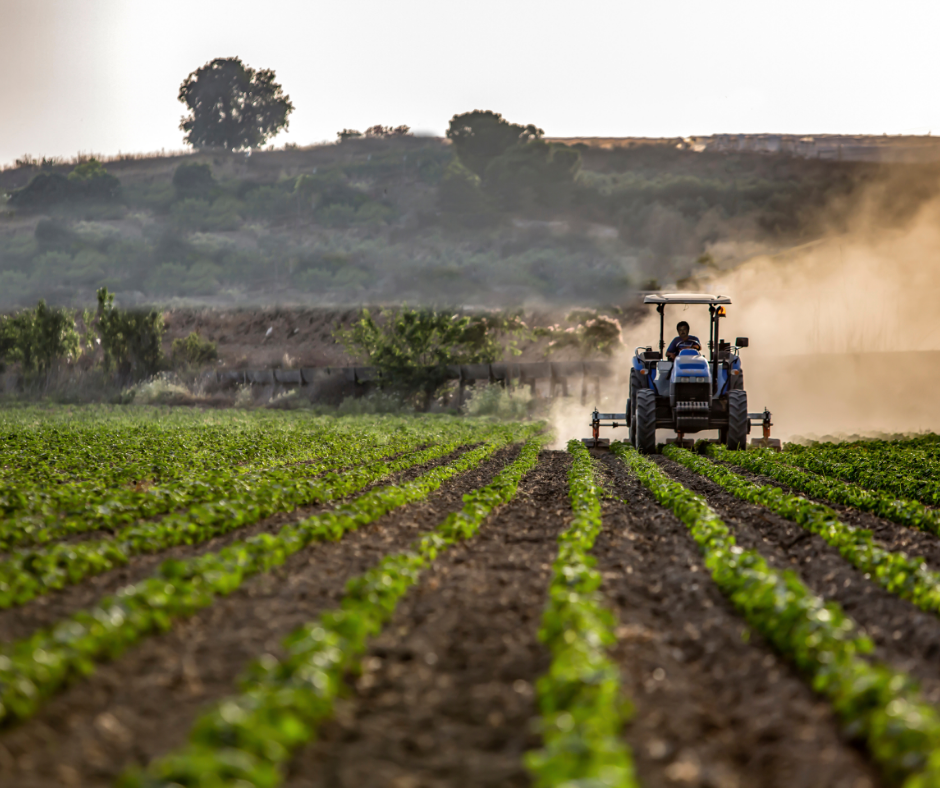

## Table of Contents


>>[Carbon Emissions Analysis](#scrollTo=lHAwXgQslDTy)

>>[Table of Contents](#scrollTo=aQ-mvsuXlUiY)

>>>>[Importing all the required modules for the notebook to run](#scrollTo=be2deb50)

>>[Load and Clean Data](#scrollTo=9fc7fc3d-6ae9-4284-9885-532d533b45ee)

>>[Clean Column Names](#scrollTo=51643353)

>>[DataFrame Information](#scrollTo=7bb48dbb)

>>[Missing Values Analysis](#scrollTo=fda06cb4)

>>[Summary of Missing Values](#scrollTo=681f5fff)

>>>[Handling missing data:](#scrollTo=681f5fff)

>>[Histogram Distribution of Columns with Missing Values](#scrollTo=681f5fff)

>>[Histogram Distribution of Columns with Missing Values](#scrollTo=1947c77a)

>>[Filling Missing Values](#scrollTo=1947c77a)

>>[Summary of Missing Values after Imputation](#scrollTo=dd09c292)

>>[Exploratory Data Analysis](#scrollTo=dbad0e53)

>>>[Summary of Descriptive Statistics](#scrollTo=dbad0e53)

>>>[Removing Duplicate Rows](#scrollTo=7a30217b)

>>>[Value Counts for a Specific Column](#scrollTo=4f6cb846)

>>>[Histograms for All Columns](#scrollTo=ef4f8c9f)

>>>[Exploring Relationships between Variables](#scrollTo=2334a275)

>>>>[Procedure Overview:](#scrollTo=2334a275)

>>>>[Visualization:](#scrollTo=2334a275)

>>>[Total Population by Gender](#scrollTo=46c05e7e)

>>>>[Procedure Overview:](#scrollTo=46c05e7e)

>>>>[Visualization:](#scrollTo=46c05e7e)

>>[Preprocessing](#scrollTo=e8b870aa-ae02-4f35-9001-1322287bae6b)

>>>[Feature Selection using VIF](#scrollTo=48c7c6ff)

>>>>[Why VIF?](#scrollTo=48c7c6ff)

>>>>[Conclusion:](#scrollTo=48c7c6ff)

>>[Model Building](#scrollTo=ba40bbab-a0ad-4f28-8c78-7e6e18e6481b)

>>>[Extreme Gradient Boosting(XGBoost)](#scrollTo=I91t3X64SiJu)

>>>[Bagging regressor](#scrollTo=pUHZheB-tOWP)

>>>[Stacking Ensemble Models](#scrollTo=YHoR5so_Qu8a)



## Project Overview


### Introduction
Our project is dedicated to analyzing and predicting CO2 emissions within the agri-food sector. Our mission is clear where we are utilizing data sourced from the FAO and IPCC, we aim to gain deep insights into carbon emissions, their sources, and impacts on climate change. With a dataset boasting over 7000 records and more than 30 features, our focus is on unraveling the intricate web of factors influencing carbon emissions in agriculture and food production. Our goal is to develop sustainable strategies that resonate with key stakeholders, including policymakers and agricultural businesses, paving the way towards a greener future.

### Problem Statement
The agri-food sector significantly contributes to global CO2 emissions, exacerbating climate change. Key sources such as crop residues, rice cultivation, food transport, and manure management substantially add to the sector's carbon footprint. Despite its role in food production and economic stability, the sector's environmental impact is a pressing concern. Moreover, the potential of forestland as a carbon sink is underutilized, with sustainable forest management practices not widely adopted.

### Objectives


*     Analyze CO2 emissions trends: Explore historical data to identify patterns and trends in CO2 emissions within the agri-food sector, shedding light on how emissions have evolved over time.
*    Predict future emissions: Utilize predictive modeling techniques to forecast CO2 emissions from the agri-food sector

*    Understand climate impacts: Investigate the relationship between CO2 emissions from agri-food activities and their broader climate impacts
*      Develop sustainable strategies: Develop data-driven strategies aimed at reducing CO2 emissions from the agri-food sector while promoting sustainable practices





#### Importing all the required modules for the notebook to run

The following code cell imports all the necessary modules to ensure that the notebook runs smoothly. By importing these modules at the beginning of the notebook, we can use their functions and classes throughout the notebook without having to re-import them in each cell.

The imported modules include essential libraries for data manipulation, visualization, and machine learning, such as NumPy, Pandas, Matplotlib, and scikit-learn. Additionally, any custom modules or functions needed for the project may also be imported in this cell.


In [ ]:
%matplotlib inline

# Standard library imports
import math
import warnings

# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppress warnings
warnings.filterwarnings('ignore')

## Load and Clean Data

This section of the notebook is dedicated to loading the dataset containing CO2 emissions from agriculture and performing any necessary cleaning steps. The dataset is loaded using the `pd.read_csv()` function from the pandas library.

The dataset is expected to be stored in a CSV file named "co2_emissions_from_agri.csv". After loading the data into a pandas DataFrame (`df`), the `head()` method is used to display the first few rows of the DataFrame, providing an initial glimpse of the data structure and contents.

This initial exploration allows us to verify that the data has been loaded correctly and to identify any potential issues or inconsistencies that may require cleaning or preprocessing.


In [ ]:
df = pd.read_csv("co2_emissions_from_agri.csv")
df.head()

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   
1         61.2125   -2388.803  ...           342.3079                     0.0   
2         53.3170   -2388.803  ...           349.1224                     0.0   
3         54.3617   -2388.803  ...           352.2947                     0.0   
4         53.9874   -2388.803  ...           367.6784                     0.0   

   Fires in humid tropical forests  On-farm energy use  Rural population  \
0                              0.0                 NaN         9655167.0   
1                              0.0                 NaN        10230490.0   
2                              0.0                 NaN        10995568.0   
3                              0.0                 NaN        11858090.0   
4                              0.0                 NaN        12690115.0   

   Urban population  Total Population - Male  Total Population - Female  \
0         2593947.0                5348387.0                  5346409.0   
1         2763167.0                5372959.0                  5372208.0   
2         2985663.0                6028494.0                  6028939.0   
3         3237009.0                7003641.0                  7000119.0   
4         3482604.0                7733458.0                  7722096.0   

   total_emission  Average Temperature °C  
0     2198.963539                0.536167  
1     2323.876629                0.020667  
2     2356.304229               -0.259583  
3     2368.470529                0.101917  
4     2500.768729                0.372250  

[5 rows x 31 columns]

## Clean Column Names

In this section, we clean the column names of the DataFrame (`df`) to ensure consistency and ease of access. The column names are modified by replacing spaces with underscores using a list comprehension.

The expression `[col.replace(" ", "_") for col in df.columns]` iterates over each column name in the DataFrame (`df.columns`), replacing any spaces with underscores. This operation ensures that column names are standardized and compatible with various operations and libraries.

After cleaning the column names, we display the first few rows of the DataFrame using the `head()` method to verify the changes and ensure that the DataFrame remains intact for further analysis.


In [ ]:
df.columns = [col.replace(" ", "_") for col in df.columns]
df.head()

Area  Year  Savanna_fires  Forest_fires  Crop_Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice_Cultivation  Drained_organic_soils_(CO2)  Pesticides_Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food_Transport  Forestland  ...  Manure_Management  Fires_in_organic_soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   
1         61.2125   -2388.803  ...           342.3079                     0.0   
2         53.3170   -2388.803  ...           349.1224                     0.0   
3         54.3617   -2388.803  ...           352.2947                     0.0   
4         53.9874   -2388.803  ...           367.6784                     0.0   

   Fires_in_humid_tropical_forests  On-farm_energy_use  Rural_population  \
0                              0.0                 NaN         9655167.0   
1                              0.0                 NaN        10230490.0   
2                              0.0                 NaN        10995568.0   
3                              0.0                 NaN        11858090.0   
4                              0.0                 NaN        12690115.0   

   Urban_population  Total_Population_-_Male  Total_Population_-_Female  \
0         2593947.0                5348387.0                  5346409.0   
1         2763167.0                5372959.0                  5372208.0   
2         2985663.0                6028494.0                  6028939.0   
3         3237009.0                7003641.0                  7000119.0   
4         3482604.0                7733458.0                  7722096.0   

   total_emission  Average_Temperature_°C  
0     2198.963539                0.536167  
1     2323.876629                0.020667  
2     2356.304229               -0.259583  
3     2368.470529                0.101917  
4     2500.768729                0.372250  

[5 rows x 31 columns]

## DataFrame Information

The `df.info()` method is used to display a concise summary of the DataFrame (`df`). It provides information about the DataFrame's structure, including the number of entries (rows), the number of columns, column names, data types, and memory usage.

This summary is useful for quickly understanding the overall characteristics of the DataFrame, such as the presence of missing values, data types of columns, and memory usage. It helps to identify potential issues or areas for further exploration and analysis.

Running `df.info()` allows us to inspect the DataFrame's metadata without displaying the entire contents, making it a valuable tool for initial data exploration and assessment.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna_fires                    6934 non-null   float64
 3   Forest_fires                     6872 non-null   float64
 4   Crop_Residues                    5576 non-null   float64
 5   Rice_Cultivation                 6965 non-null   float64
 6   Drained_organic_soils_(CO2)      6965 non-null   float64
 7   Pesticides_Manufacturing         6965 non-null   float64
 8   Food_Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net_Forest_conversion            6472 non-null   float64
 11  Food_Household_Consumption       6492 non-null   float64
 12  Food_Retail         

In [ ]:
df.describe()

Year  Savanna_fires  Forest_fires  Crop_Residues  \
count  6965.000000    6934.000000   6872.000000    5576.000000   
mean   2005.124910    1188.390893    919.302167     998.706309   
std       8.894665    5246.287783   3720.078752    3700.345330   
min    1990.000000       0.000000      0.000000       0.000200   
25%    1997.000000       0.000000      0.000000      11.006525   
50%    2005.000000       1.651850      0.517900     103.698200   
75%    2013.000000     111.081400     64.950775     377.640975   
max    2020.000000  114616.401100  52227.630600   33490.074100   

       Rice_Cultivation  Drained_organic_soils_(CO2)  \
count       6965.000000                  6965.000000   
mean        4259.666673                  3503.228636   
std        17613.825187                 15861.445678   
min            0.000000                     0.000000   
25%          181.260800                     0.000000   
50%          534.817400                     0.000000   
75%         1536.640000                   690.408800   
max       164915.255600                241025.069600   

       Pesticides_Manufacturing  Food_Transport     Forestland  \
count               6965.000000     6965.000000    6472.000000   
mean                 333.418393     1939.581760  -17828.285678   
std                 1429.159367     5616.748808   81832.210543   
min                    0.000000        0.000100 -797183.079000   
25%                    6.000000       27.958600   -2848.350000   
50%                   13.000000      204.962800     -62.920000   
75%                  116.325487     1207.000900       0.000000   
max                16459.000000    67945.765000  171121.076000   

       Net_Forest_conversion  ...  Manure_Management  Fires_in_organic_soils  \
count           6.472000e+03  ...        6037.000000             6965.000000   
mean            1.760564e+04  ...        2263.344946             1210.315532   
std             1.011575e+05  ...        7980.542461            22669.847760   
min             0.000000e+00  ...           0.432900                0.000000   
25%             0.000000e+00  ...          37.632100                0.000000   
50%             4.444000e+01  ...         269.856300                0.000000   
75%             4.701746e+03  ...        1126.818900                0.000000   
max             1.605106e+06  ...       70592.646500           991717.543100   

       Fires_in_humid_tropical_forests  On-farm_energy_use  Rural_population  \
count                      6810.000000         6009.000000      6.965000e+03   
mean                        668.452931         3008.982252      1.785774e+07   
std                        3264.879486        12637.864430      8.901521e+07   
min                           0.000000            0.031900      0.000000e+00   
25%                           0.000000           13.291900      9.731100e+04   
50%                           0.000000          141.096300      1.595322e+06   
75%                           9.577875         1136.925400      8.177340e+06   
max                       51771.256800       248879.176900      9.000991e+08   

       Urban_population  Total_Population_-_Male  Total_Population_-_Female  \
count      6.965000e+03             6.965000e+03               6.965000e+03   
mean       1.693230e+07             1.761963e+07               1.732447e+07   
std        6.574362e+07             7.603993e+07               7.251711e+07   
min        0.000000e+00             2.500000e+02               2.700000e+02   
25%        2.173860e+05             2.013260e+05               2.078900e+05   
50%        2.357581e+06             2.469660e+06               2.444135e+06   
75%        8.277123e+06             9.075924e+06               9.112588e+06   
max        9.020778e+08             7.435866e+08               7.133419e+08   

       total_emission  Average_Temperature_°C  
count    6.965000e+03             6965.000000  
mean     6.409124e+04                0.872989  
std      2.283130e+05

## Missing Values Analysis

The `df.isna().sum()` method is used to identify missing values in the DataFrame (`df`) and calculate the total number of missing values for each column.

By chaining the `isna()` method with `.sum()`, we generate a summary that shows the count of missing values for each column. This allows us to quickly assess the extent of missing data in the dataset.

Identifying missing values is an essential step in data preprocessing and cleaning. It helps us understand the completeness of the dataset and decide on appropriate strategies for handling missing data, such as imputation or removal.

Running `df.isna().sum()` provides valuable insights into the quality and integrity of the dataset, guiding subsequent data cleaning and preprocessing steps.


In [ ]:
df.isna().sum()

Area                                  0
Year                                  0
Savanna_fires                        31
Forest_fires                         93
Crop_Residues                      1389
Rice_Cultivation                      0
Drained_organic_soils_(CO2)           0
Pesticides_Manufacturing              0
Food_Transport                        0
Forestland                          493
Net_Forest_conversion               493
Food_Household_Consumption          473
Food_Retail                           0
On-farm_Electricity_Use               0
Food_Packaging                        0
Agrifood_Systems_Waste_Disposal       0
Food_Processing                       0
Fertilizers_Manufacturing             0
IPPU                                743
Manure_applied_to_Soils             928
Manure_left_on_Pasture                0
Manure_Management                   928
Fires_in_organic_soils                0
Fires_in_humid_tropical_forests     155
On-farm_energy_use                  956


## Summary of Missing Values

The output above presents a summary of missing values in each column of the DataFrame.

- The column names are listed on the left side, while the corresponding count of missing values for each column is shown on the right side.
- For example, the column 'Savanna_fires' has 31 missing values, 'Forest_fires' has 93 missing values, and 'Crop_Residues' has 1389 missing values.
- The message "Output is truncated" indicates that the output is too long to display fully in the cell and suggests viewing it in a scrollable element or opening it in a text editor for complete inspection.

These results indicate that there are missing values in the DataFrame, which need to be addressed. Missing values can adversely affect the quality and reliability of data analysis and modeling.

Columns with missing values may require special attention during data preprocessing. Depending on the significance of the missing data and the analysis goals, various strategies such as imputation, removal of rows or columns, or advanced techniques like predictive modeling can be employed to handle missing values.

It is important to carefully consider the impact of missing data on the analysis and choose appropriate methods for handling them to ensure the integrity and accuracy of the results.
### Handling missing data:
- Mean-It is preferred if data is numeric and not skewed.

Median-It is preferred if data is numeric and skewed
-
Mode-It is preferred if the data is a string(object) or numeric.

## Histogram Distribution of Columns with Missing Values

The cell below generates histograms to visualize the distribution of values for columns that have missing data. By examining these histograms, we can better understand the data distributions and identify any potential outliers or anomalies within these columns. This visualization is crucial for assessing the nature of the missing data and planning appropriate data cleaning and preprocessing steps.


array([[<Axes: title={'center': 'Savanna_fires'}>,
        <Axes: title={'center': 'Forest_fires'}>,
        <Axes: title={'center': 'Crop_Residues'}>],
       [<Axes: title={'center': 'Forestland'}>,
        <Axes: title={'center': 'Net_Forest_conversion'}>,
        <Axes: title={'center': 'Food_Household_Consumption'}>],
       [<Axes: title={'center': 'IPPU'}>,
        <Axes: title={'center': 'Manure_applied_to_Soils'}>,
        <Axes: title={'center': 'Manure_Management'}>],
       [<Axes: title={'center': 'On-farm_energy_use'}>, <Axes: >,
        <Axes: >]], dtype=object)

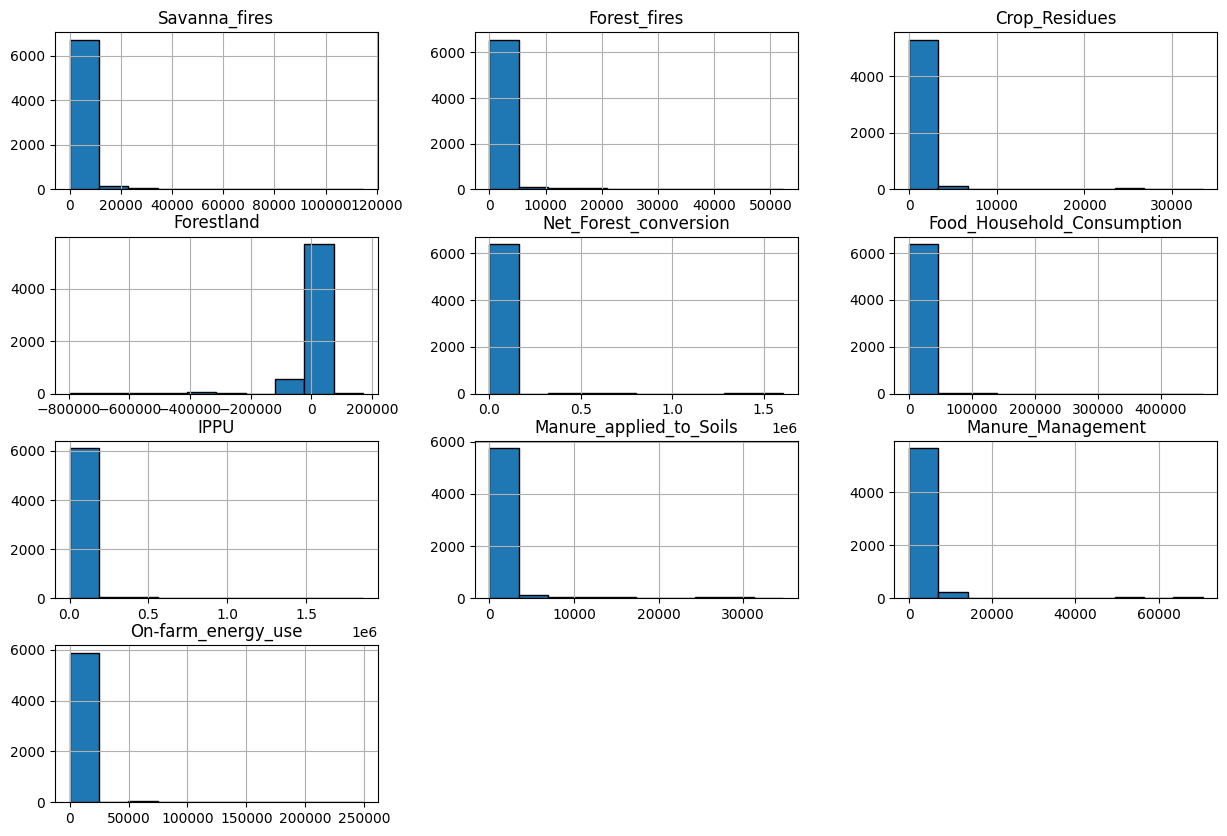

In [ ]:
df_check = df[
    [
        "Savanna_fires",
        "Forest_fires",
        "Crop_Residues",
        "Forestland",
        "Net_Forest_conversion",
        "Food_Household_Consumption",
        "IPPU",
        "Manure_applied_to_Soils",
        "Manure_Management",
        "On-farm_energy_use",
    ]
]

df_check.hist(bins=10, figsize=(15, 10), edgecolor="black")

## Histogram Distribution of Columns with Missing Values

The visualizations above display histograms to visualize the distribution of values for columns that have missing data. The summary of the distributions is as follows:

- Most of the histograms have a single, long bar indicating a concentration of values in one bin, which suggests low variability in these columns.
- A few histograms display two bars, with the second bar being very small and potentially negligible. This indicates that while most data points are clustered within a specific range, there are some values that slightly deviate from this cluster.

These visualizations help us understand that the majority of the data points are concentrated within a narrow range for most columns, indicating low variability. The presence of small additional bars in a few histograms suggests minimal deviation or outliers in those columns. This information is crucial for assessing the nature of the missing data and planning appropriate data cleaning and preprocessing steps.
## Filling Missing Values

The cell below fills in missing values in the numeric columns of the DataFrame using the median. This approach is chosen to avoid the potential impact of outliers on the imputation process.

By replacing missing values with the median, which is robust to outliers, we ensure that the integrity of the data is maintained while preparing it for further analysis or modeling. These preprocessing steps are crucial for ensuring the accuracy and reliability of the subsequent analysis.


In [ ]:
numeric_cols = df.select_dtypes(include=[np.number])
non_numeric_cols = df.select_dtypes(exclude=[np.number])

# Fill NaN values in numeric columns with the mean of each column
numeric_cols_filled = numeric_cols.fillna(numeric_cols.median())

df_filled = pd.concat([non_numeric_cols, numeric_cols_filled], axis=1)

df = df_filled.copy()
df.isna().sum()

Area                               0
Year                               0
Savanna_fires                      0
Forest_fires                       0
Crop_Residues                      0
Rice_Cultivation                   0
Drained_organic_soils_(CO2)        0
Pesticides_Manufacturing           0
Food_Transport                     0
Forestland                         0
Net_Forest_conversion              0
Food_Household_Consumption         0
Food_Retail                        0
On-farm_Electricity_Use            0
Food_Packaging                     0
Agrifood_Systems_Waste_Disposal    0
Food_Processing                    0
Fertilizers_Manufacturing          0
IPPU                               0
Manure_applied_to_Soils            0
Manure_left_on_Pasture             0
Manure_Management                  0
Fires_in_organic_soils             0
Fires_in_humid_tropical_forests    0
On-farm_energy_use                 0
Rural_population                   0
Urban_population                   0
T

## Summary of Missing Values after Imputation

The output above shows the number of missing values in each column of the DataFrame after the imputation process.

- All columns now have zero missing values, indicating that the missing values have been successfully filled using the median of each numeric column.
- This confirms that the data preprocessing step to handle missing values was effective, and the DataFrame is now ready for further analysis or modeling.

Ensuring that there are no missing values in the dataset is essential for maintaining the integrity and reliability of the data analysis results. This summary confirms that the missing data issue has been appropriately addressed, laying a solid foundation for subsequent analytical tasks.


## Exploratory Data Analysis
### Summary of Descriptive Statistics

The cell below provides a summary of descriptive statistics for the DataFrame.

- The `.describe()` method calculates various statistics, including count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum, for each numeric column in the DataFrame.
- Transposing the DataFrame using `.T` swaps rows and columns to make the output easier to read.

Analyzing descriptive statistics is essential for gaining insights into the distribution and characteristics of the data, which can inform subsequent analysis and modeling tasks.


In [ ]:
df.describe().T

count          mean           std  \
Year                             6965.0  2.005125e+03  8.894665e+00   
Savanna_fires                    6965.0  1.183109e+03  5.235194e+03   
Forest_fires                     6965.0  9.070341e+02  3.696660e+03   
Crop_Residues                    6965.0  8.202187e+02  3.330079e+03   
Rice_Cultivation                 6965.0  4.259667e+03  1.761383e+04   
Drained_organic_soils_(CO2)      6965.0  3.503229e+03  1.586145e+04   
Pesticides_Manufacturing         6965.0  3.334184e+02  1.429159e+03   
Food_Transport                   6965.0  1.939582e+03  5.616749e+03   
Forestland                       6965.0 -1.657081e+04  7.901397e+04   
Net_Forest_conversion            6965.0  1.636262e+04  9.761518e+04   
Food_Household_Consumption       6965.0  4.528935e+03  2.492591e+04   
Food_Retail                      6965.0  2.043211e+03  8.494249e+03   
On-farm_Electricity_Use          6965.0  1.626681e+03  9.343182e+03   
Food_Packaging                   6965.0  1.658630e+03  1.148134e+04   
Agrifood_Systems_Waste_Disposal  6965.0  6.018445e+03  2.215674e+04   
Food_Processing                  6965.0  3.872724e+03  1.983822e+04   
Fertilizers_Manufacturing        6965.0  3.035723e+03  1.169303e+04   
IPPU                             6965.0  1.794462e+04  1.054759e+05   
Manure_applied_to_Soils          6965.0  8.162649e+02  3.016662e+03   
Manure_left_on_Pasture           6965.0  3.518027e+03  9.103556e+03   
Manure_Management                6965.0  1.997737e+03  7.460634e+03   
Fires_in_organic_soils           6965.0  1.210316e+03  2.266985e+04   
Fires_in_humid_tropical_forests  6965.0  6.535771e+02  3.229847e+03   
On-farm_energy_use               6965.0  2.615343e+03  1.177983e+04   
Rural_population                 6965.0  1.785774e+07  8.901521e+07   
Urban_population                 6965.0  1.693230e+07  6.574362e+07   
Total_Population_-_Male          6965.0  1.761963e+07  7.603993e+07   
Total_Population_-_Female        6965.0  1.732447e+07  7.251711e+07   
total_emission                   6965.0  6.409124e+04  2.283130e+05   
Average_Temperature_°C           6965.0  8.729891e-01  5.559295e-01   

                                           min            25%           50%  \
Year                               1990.000000    1997.000000  2.005000e+03   
Savanna_fires                         0.000000       0.000000  1.651850e+00   
Forest_fires                          0.000000       0.000000  5.179000e-01   
Crop_Residues                         0.000200      25.360100  1.036982e+02   
Rice_Cultivation                      0.000000     181.260800  5.348174e+02   
Drained_organic_soils_(CO2)           0.000000       0.000000  0.000000e+00   
Pesticides_Manufacturing              0.000000       6.000000  1.300000e+01   
Food_Transport                        0.000100      27.958600  2.049628e+02   
Forestland                      -797183.079000   -2299.387200 -6.292000e+01   
Net_Forest_conversion                 0.000000       0.000000  4.444000e+01   
Food_Household_Consumption            0.000000      13.797400  1.554711e+02   
Food_Retail                           0.000000      26.818500  1.720426e+02   
On-farm_Electricity_Use               0.000000       8.037600  2.912070e+01   
Food_Packaging                        0.000000      67.631366  7.401813e+01   
Agrifood_Systems_Waste_Disposal       0.340000      86.680500  9.012757e+02   
Food_Processing                       0.000100     209.587728  3.447602e+02   
Fertilizers_Manufacturing             0.001900     360.358799  1.115052e+03   
IPPU                                  0.000000      51.930700  8.037066e+02   
Manure_applied_to_Soils               0.049000      23.119500  1.204439e+02   
Manure_left_on_Pasture                0.000700     139.669900  9.725674e+02   
Manure_Management                     0.432900      52.707800  2.698563e+02   
Fires_in_organic_soils                0.000000       0.000000  0.000000e+00   
Fires_in_humid_

### Removing Duplicate Rows

The cell below removes duplicate rows from the DataFrame, if any exist.

- The `.drop_duplicates()` method removes duplicate rows based on all columns by default.
- If there are any duplicate rows in the DataFrame, they will be removed, and only unique rows will be retained.
- This operation helps ensure data integrity and eliminates redundancy in the dataset.

Removing duplicate rows is an important data preprocessing step to avoid potential biases or inaccuracies in the analysis results.


In [ ]:
df.drop_duplicates()

Area  Year  Savanna_fires  Forest_fires  Crop_Residues  \
0     Afghanistan  1990        14.7237        0.0557       205.6077   
1     Afghanistan  1991        14.7237        0.0557       209.4971   
2     Afghanistan  1992        14.7237        0.0557       196.5341   
3     Afghanistan  1993        14.7237        0.0557       230.8175   
4     Afghanistan  1994        14.7237        0.0557       242.0494   
...           ...   ...            ...           ...            ...   
6960     Zimbabwe  2016      1190.0089      232.5068        70.9451   
6961     Zimbabwe  2017      1431.1407      131.1324       108.6262   
6962     Zimbabwe  2018      1557.5830      221.6222       109.9835   
6963     Zimbabwe  2019      1591.6049      171.0262        45.4574   
6964     Zimbabwe  2020       481.9027       48.4197       108.3022   

      Rice_Cultivation  Drained_organic_soils_(CO2)  Pesticides_Manufacturing  \
0             686.0000                          0.0                 11.807483   
1             678.1600                          0.0                 11.712073   
2             686.0000                          0.0                 11.712073   
3             686.0000                          0.0                 11.712073   
4             705.6000                          0.0                 11.712073   
...                ...                          ...                       ...   
6960            7.4088                          0.0                 75.000000   
6961            7.9458                          0.0                 67.000000   
6962            8.1399                          0.0                 66.000000   
6963            7.8322                          0.0                 73.000000   
6964            7.9733                          0.0                 73.000000   

      Food_Transport  Forestland  ...  Manure_Management  \
0            63.1152  -2388.8030  ...           319.1763   
1            61.2125  -2388.8030  ...           342.3079   
2            53.3170  -2388.8030  ...           349.1224   
3            54.3617  -2388.8030  ...           352.2947   
4            53.9874  -2388.8030  ...           367.6784   
...              ...         ...  ...                ...   
6960        251.1465  76500.2982  ...           282.5994   
6961        255.7975  76500.2982  ...           255.5900   
6962        327.0897  76500.2982  ...           257.2735   
6963        290.1893  76500.2982  ...           267.5224   
6964        238.7639  76500.2982  ...           266.7316   

      Fires_in_organic_soils  Fires_in_humid_tropical_forests  \
0                        0.0                              0.0   
1                        0.0                              0.0   
2                        0.0                              0.0   
3                        0.0                              0.0   
4                        0.0                              0.0   
...                      ...                              ...   
6960                     0.0                              0.0   
6961                     0.0                              0.0   
6962                     0.0                              0.0   
6963                     0.0                              0.0   
6964                     0.0                              0.0   

      On-farm_energy_use  Rural_population  Urban_population  \
0               141.0963         9655167.0         2593947.0   
1               141.0963        10230490.0         2763167.0   
2               141.0963        10995568.0         2985663.0   
3               141.0963        11858090.0         3237009.0   
4               141.0963        12690115.0         3482604.0   
...                  ...               ...               ...   
6960            417.3150        10934468.0         5215894.0   
6961            398.1644        11201138.0         5328766.0   
6962            465.7735        11465748.0         5447513.0   
6963            444.2335        11725970.0   

### Value Counts for a Specific Column

The cell below calculates the frequency of each unique value in the 'Drained_organic_soils_(CO2)' column of the DataFrame.

- The `.value_counts()` method counts the occurrences of each unique value in the specified column.
- This operation provides insights into the distribution and frequency of different values in the column.

Analyzing value counts is helpful for understanding the distribution of categorical or discrete variables and identifying any patterns or anomalies in the data.


In [ ]:
columns = ["Drained_organic_soils_(CO2)", "Fires_in_organic_soils", "Fires_in_humid_tropical_forests"]

for column in columns:
    print(df[column].value_counts())

Drained_organic_soils_(CO2)
0.0000        3853
0.4596          29
235.9155        29
8.3403          28
0.8185          24
              ... 
5602.6975        1
5602.2051        1
5602.0383        1
5659.5934        1
14566.6658       1
Name: count, Length: 2147, dtype: int64
Fires_in_organic_soils
0.000000         6656
0.058149          155
3521.612200         6
392.285100          6
9251.057700         6
                 ... 
523099.074600       1
187100.934800       1
217996.982200       1
206751.929000       1
497.465400          1
Name: count, Length: 126, dtype: int64
Fires_in_humid_tropical_forests
0.0000        4632
0.1388          19
0.1389          12
1.8252          12
0.8328          10
              ... 
597.2093         1
604.5683         1
599.5691         1
304.7160         1
19808.3477       1
Name: count, Length: 1736, dtype: int64


### Histograms for All Columns

The cell below generates histograms for all columns in the DataFrame.

- The `.hist()` method creates histograms to visualize the distribution of values in each column.
- Setting the `figsize` parameter to `(20, 20)` ensures that the size of each histogram plot is large enough for clear visualization.

Histograms are useful for understanding the distribution and spread of data across different columns, which can provide insights into the underlying patterns and characteristics of the dataset.


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Savanna_fires'}>,
        <Axes: title={'center': 'Forest_fires'}>,
        <Axes: title={'center': 'Crop_Residues'}>,
        <Axes: title={'center': 'Rice_Cultivation'}>],
       [<Axes: title={'center': 'Drained_organic_soils_(CO2)'}>,
        <Axes: title={'center': 'Pesticides_Manufacturing'}>,
        <Axes: title={'center': 'Food_Transport'}>,
        <Axes: title={'center': 'Forestland'}>,
        <Axes: title={'center': 'Net_Forest_conversion'}>],
       [<Axes: title={'center': 'Food_Household_Consumption'}>,
        <Axes: title={'center': 'Food_Retail'}>,
        <Axes: title={'center': 'On-farm_Electricity_Use'}>,
        <Axes: title={'center': 'Food_Packaging'}>,
        <Axes: title={'center': 'Agrifood_Systems_Waste_Disposal'}>],
       [<Axes: title={'center': 'Food_Processing'}>,
        <Axes: title={'center': 'Fertilizers_Manufacturing'}>,
        <Axes: title={'center': 'IPPU'}>,
        <A

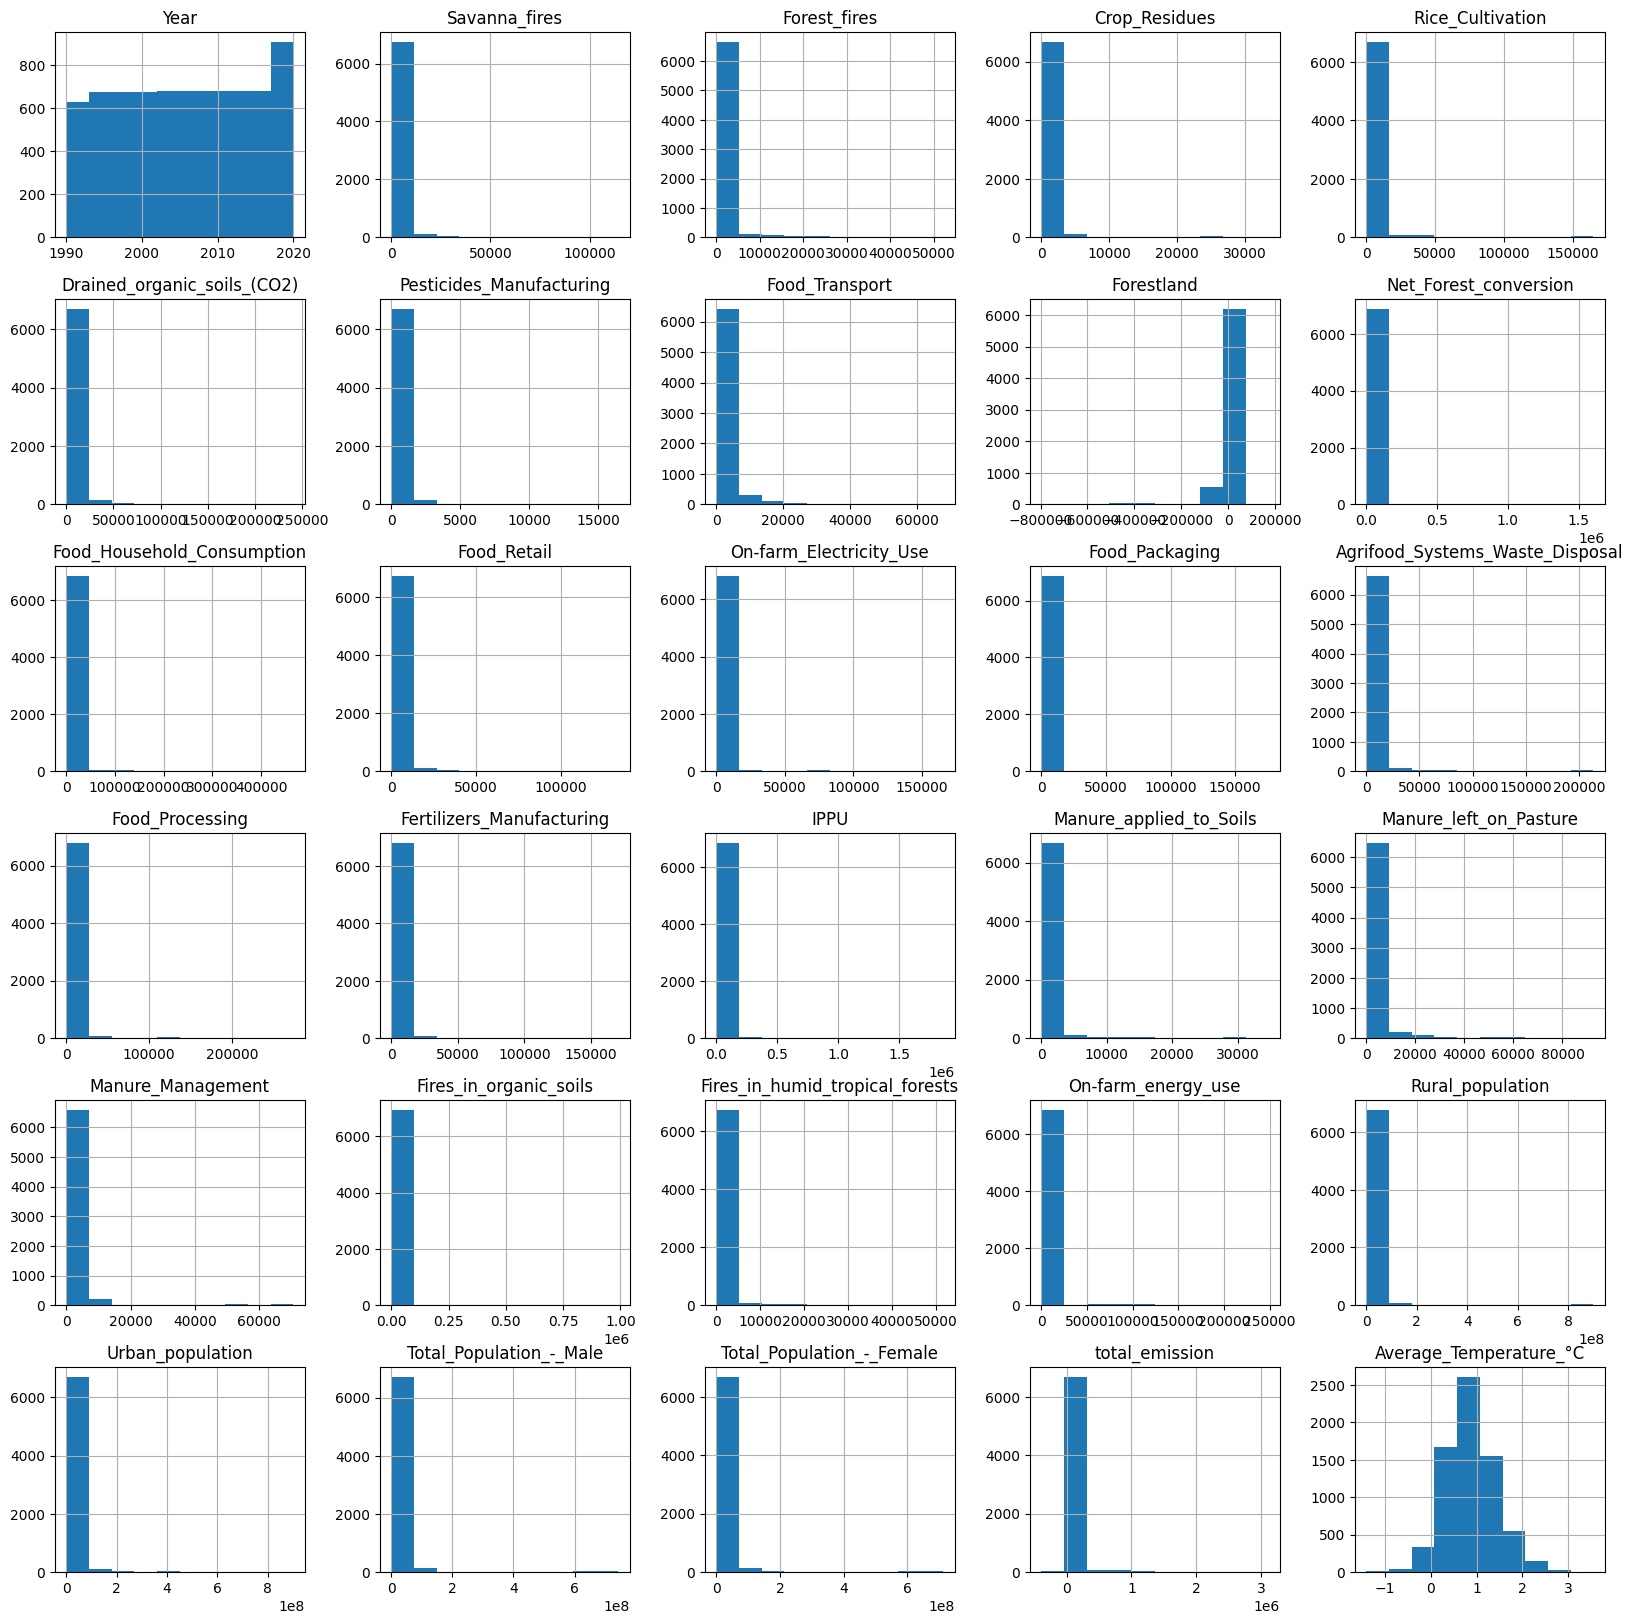

In [ ]:
df.hist(figsize=(20, 20))

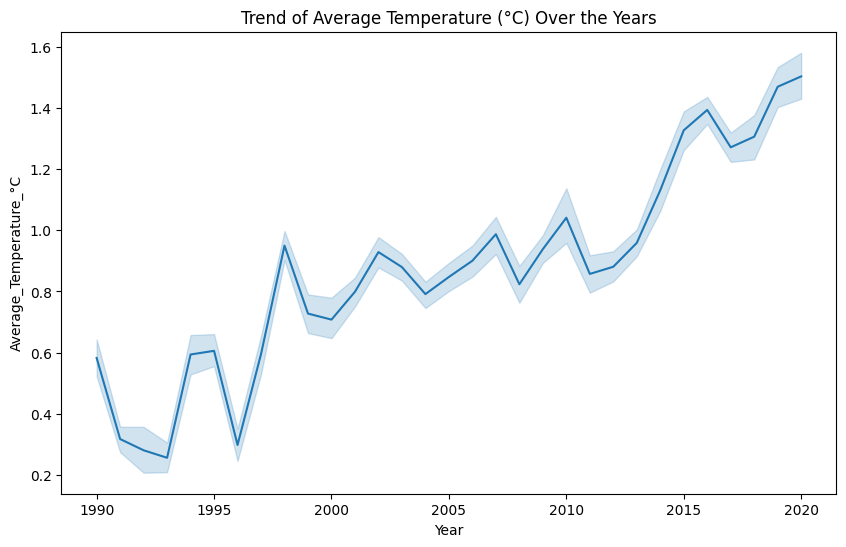

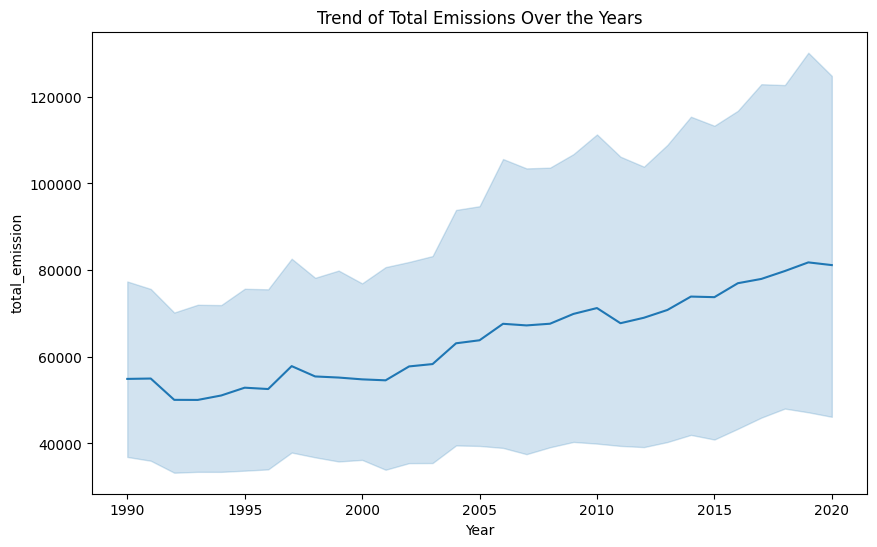

In [ ]:
def line_graph(df, x, y, title):
    """
    The function receives a dataframe as the first argument followed by the independet variable x and column Y and
    the title of the graph to be plotted, the fuction use these arguments to plot a line graph
    """

    # Time Series Analysis - Trend Analysis
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=x, y=y, data=df)
    plt.title(title)
    plt.show()


line_graph(
    df,
    "Year",
    "Average_Temperature_°C",
    "Trend of Average Temperature (°C) Over the Years",
)

line_graph(df, "Year", "total_emission", "Trend of Total Emissions Over the Years")

The line graph of average temperatures by year clearly shows a rise from the 1990s to 2020, while the line graph of total emissions by year leaves no doubt that carbon dioxide emissions have steadily increased linearly over the years.


Correlation with total_emission:

 total_emission                     1.000000
Urban_population                   0.907774
Agrifood_Systems_Waste_Disposal    0.879840
Food_Household_Consumption         0.861937
IPPU                               0.851667
Manure_applied_to_Soils            0.845955
Food_Packaging                     0.842555
Crop_Residues                      0.836232
Total_Population_-_Female          0.823163
Total_Population_-_Male            0.818163
Fertilizers_Manufacturing          0.816064
Food_Processing                    0.814844
Manure_Management                  0.805169
On-farm_energy_use                 0.796253
Rice_Cultivation                   0.756638
Food_Retail                        0.755753
Manure_left_on_Pasture             0.755672
Pesticides_Manufacturing           0.746777
Rural_population                   0.705162
On-farm_Electricity_Use            0.692060
Food_Transport                     0.657877
Net_Forest_conversion              0.4319

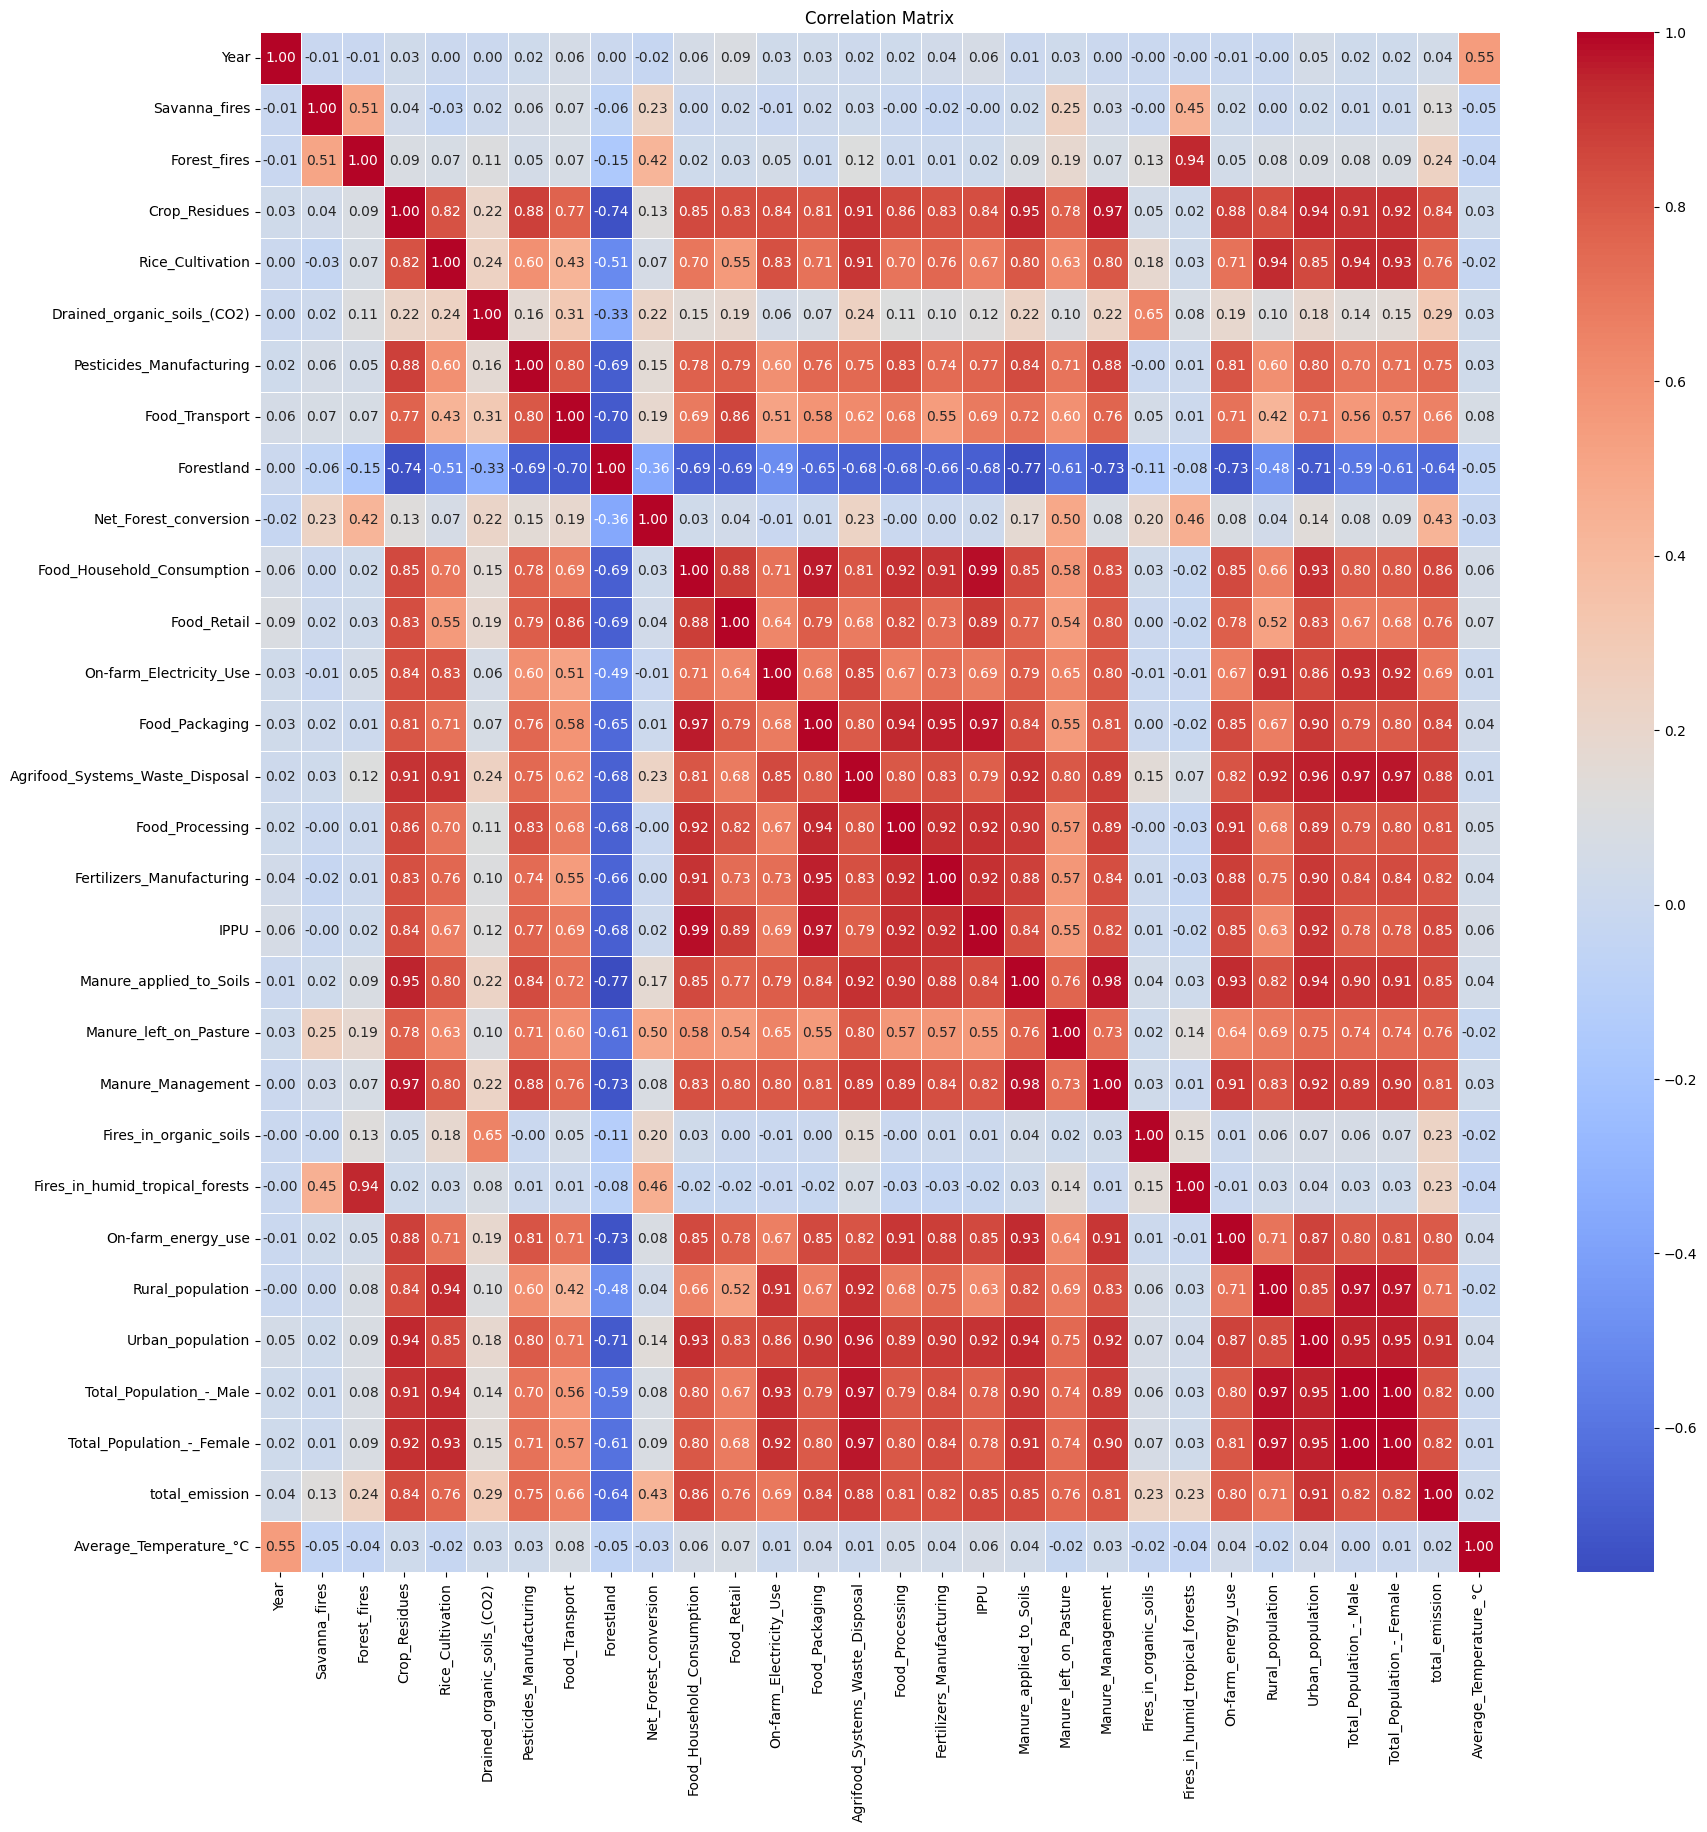

In [ ]:
corr = df.drop("Area", axis=1).corr()
print("Correlation with total_emission:\n\n",
      corr["total_emission"].sort_values(ascending=False))

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


From the heat map, it is evident that there is a multilinear correlation between many variables, the squares appering in dark blue indicate a negative correlation whiile the squares appearing in dark red or meron indicate positive correlation. multilinear correlation is not good for a reggration model.  


Exploring the total emissions per year.

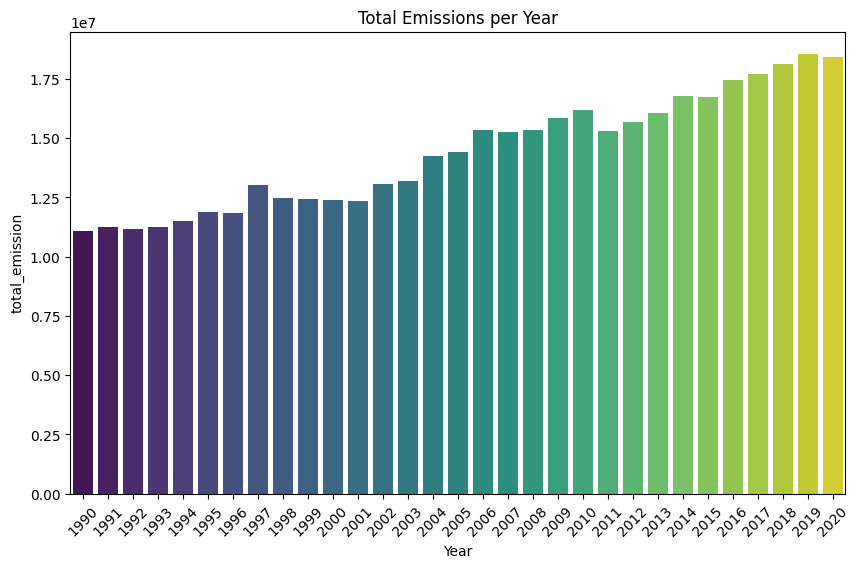

In [ ]:
def bar_graph_plots(df, title, x, y):

    emissions_per_year = df.groupby(x)[y].sum().reset_index()

    # Plot the data using seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x, y=y, data=emissions_per_year, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(title)


bar_graph_plots(df, "Total Emissions per Year", "Year", "total_emission")

### Exploring Relationships between Variables

In this section, we visualize the relationships between the target variable and other features in the dataset. The target variable is defined as `"total_emission"`, while non-numeric features are labeled as `"Area"`. We aim to understand how each feature relates to the target variable through scatter plots.

#### Procedure Overview:

- **Data Setup**:
  - Identify the target variable and non-numeric features.
  - Calculate the number of numeric features to visualize.

- **Plotting**:
  - Determine the layout of subplots based on the number of features.
  - Iterate over each numeric feature:
    - Create a scatter plot between the feature and the target variable.
    - Set titles and labels for each subplot accordingly.

- **Display**:
  - Show the scatter plots in a grid layout.
  - Remove any empty subplots to enhance readability.

#### Visualization:

The generated scatter plots depict the relationships between `"total_emission"` and other numeric features in the dataset. Each subplot represents a scatter plot of the target variable against a specific feature.


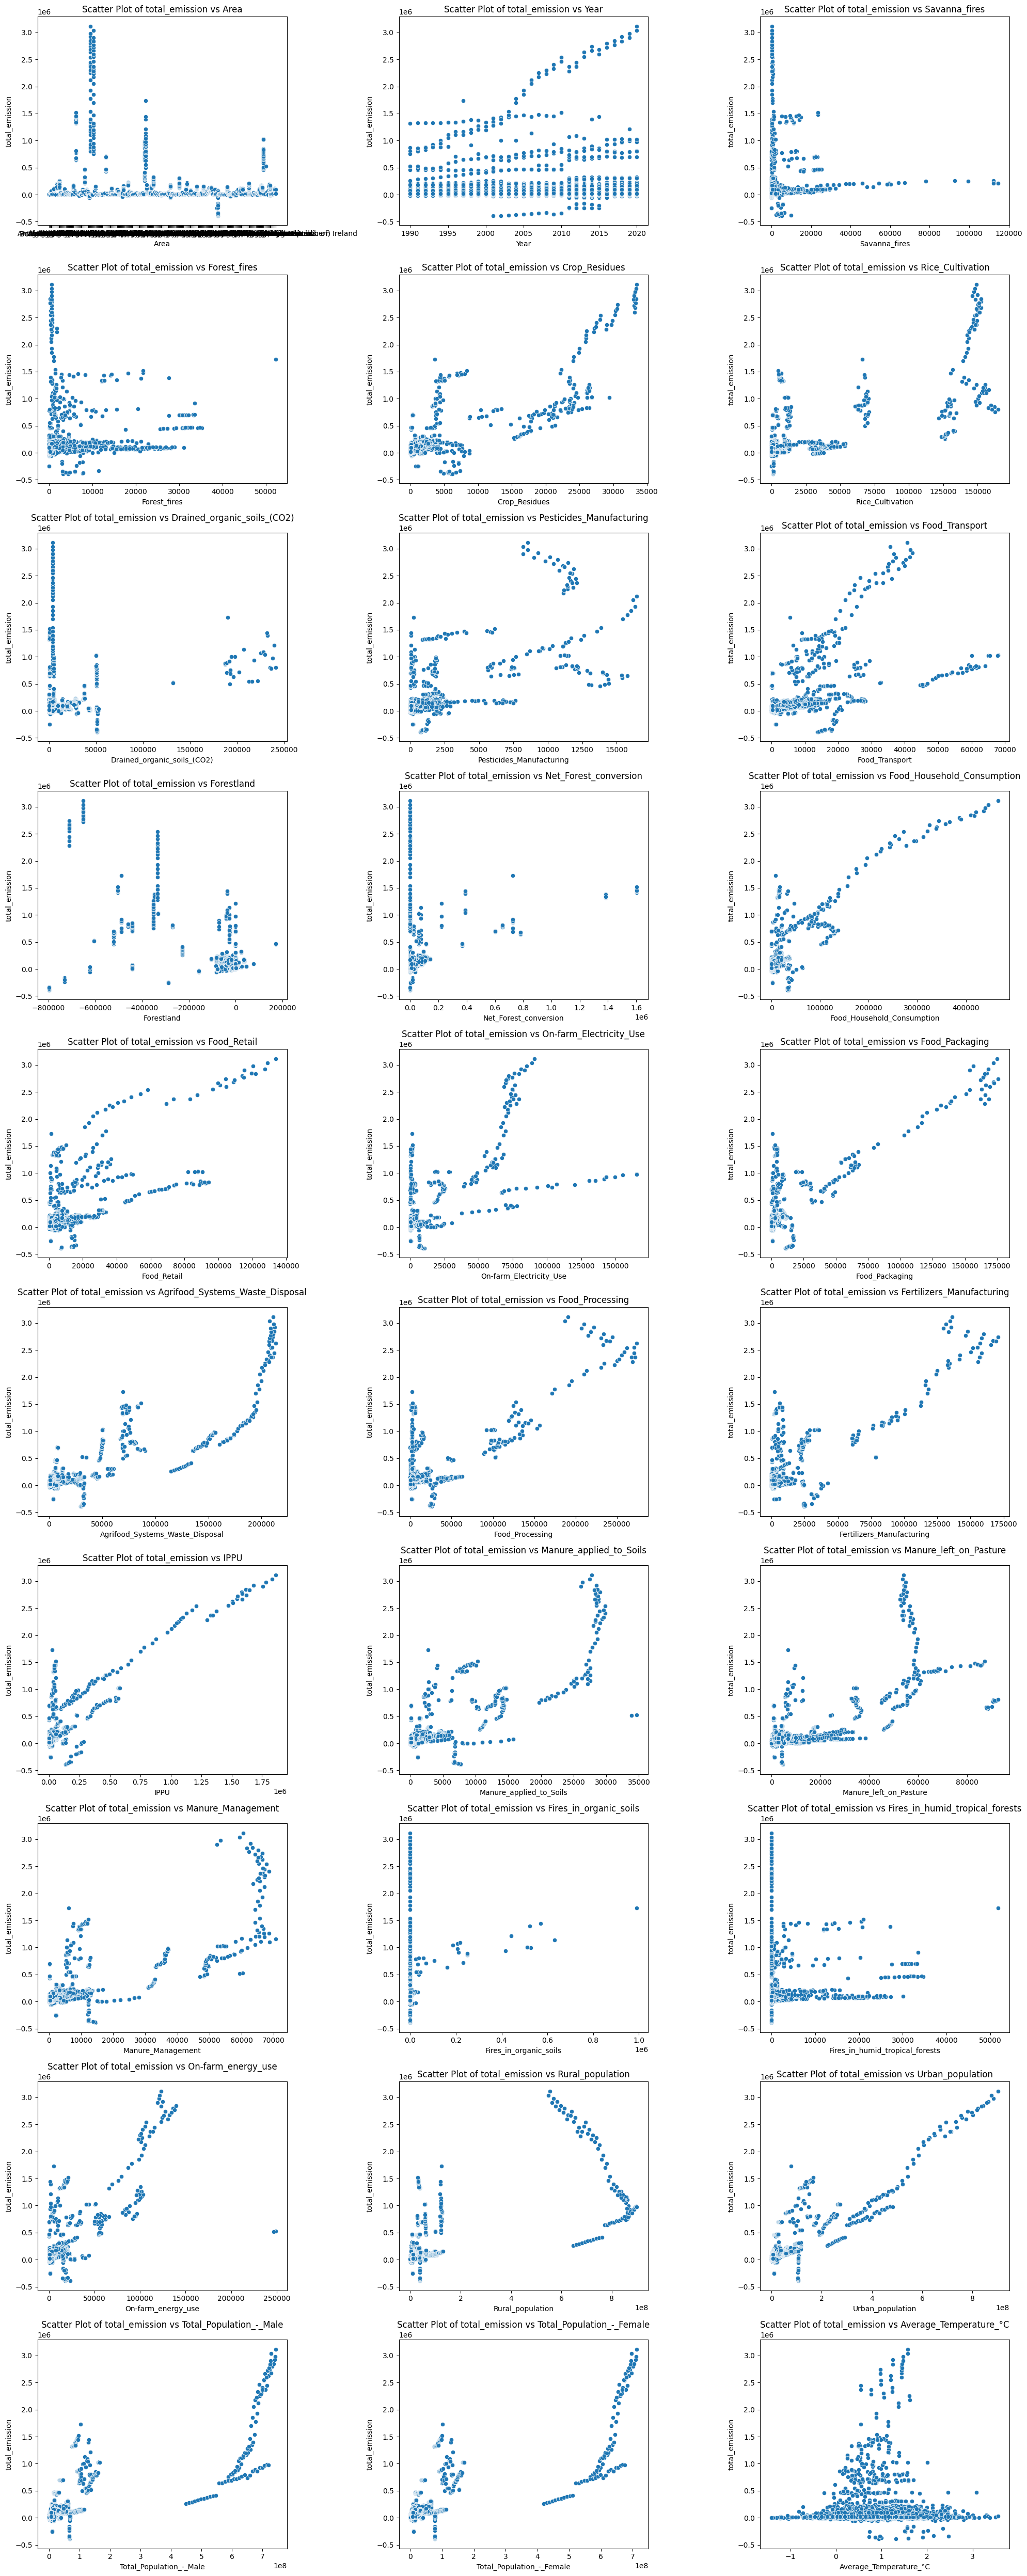

In [ ]:
target_variable = "total_emission"
#non_num = "Area"

features = df.columns.drop([target_variable])
num_features = len(features)

# the number of rows and columns for the subplots
num_cols = 3  # e number of columns in the grid
num_rows = math.ceil(num_features / num_cols)

#  subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(x=feature, y=target_variable, data=df, ax=axes[i])
    axes[i].set_title(f"Scatter Plot of {target_variable} vs {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target_variable)

# Remove any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Total Population by Gender

In this section, we calculate and visualize the total population by gender using the provided dataset. The total male and female populations are computed separately, and then a bar graph is generated to illustrate the distribution.

#### Procedure Overview:

- **Population Calculation**:
  - Compute the total population for both males and females from the dataset.

- **Data Preparation**:
  - Create a DataFrame containing the gender labels ('Male' and 'Female') along with their corresponding total populations.

- **Plotting**:
  - Generate a bar graph to represent the total population by gender.
  - Set appropriate labels and titles for the visualization.

#### Visualization:

The resulting bar graph displays the total population categorized by gender. Each bar represents either male or female population, providing a clear comparison between the two categories.


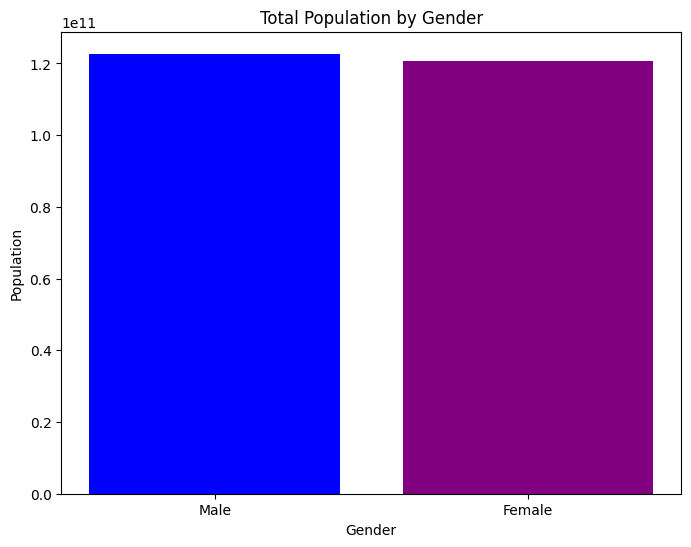

In [ ]:
total_male_population = df['Total_Population_-_Male'].sum()
total_female_population = df['Total_Population_-_Female'].sum()

# Create a DataFrame for plotting
data = {
    'Gender': ['Male', 'Female'],
    'Population': [total_male_population, total_female_population]
}
population_df = pd.DataFrame(data)

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(population_df['Gender'], population_df['Population'], color=['blue', 'purple'])
plt.title('Total Population by Gender')
plt.xlabel('Gender')
plt.ylabel('Population')
plt.show()

The visual shows that males are slightly higher than females.

## Preprocessing

Prepares dataset for regression by selecting predictor variables and target variable.


In [ ]:
X = df.drop(['total_emission','Area'], axis= 1)
y = df['total_emission']

### Feature Selection using VIF

VIF (Variance Inflation Factor) was utilized for feature selection.

#### Why VIF?

- **Identifies Multicollinearity**: VIF helps in detecting multicollinearity among features. Multicollinearity inflates the variance of coefficient estimates.

- **Indicates Feature Correlation**: High VIF values signify strong correlation among features. Features with high VIF may be redundant.

- **Improves Model Interpretability**: Removing redundant features enhances model interpretability and reduces the risk of overfitting.

#### Conclusion:

VIF serves as a valuable tool for identifying and removing redundant features.

The following function calculates the VIF (Variance Inflation Factor) for each feature in the dataset.


In [ ]:
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Sorting by VIF in descending order
    vif = vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)

    return vif

calc_vif(X)


variables           VIF
0         Total_Population_-_Female  10920.851503
1           Total_Population_-_Male   9806.038187
2                  Rural_population   1169.539383
3                  Urban_population    854.888686
4           Manure_applied_to_Soils    150.146483
5                 Manure_Management    131.684410
6                              IPPU    111.680539
7                    Food_Packaging     91.429326
8   Agrifood_Systems_Waste_Disposal     69.257140
9        Food_Household_Consumption     65.699513
10                    Crop_Residues     57.494443
11                  Food_Processing     28.467221
12        Fertilizers_Manufacturing     25.152310
13                      Food_Retail     24.814031
14          On-farm_Electricity_Use     17.248594
15                   Food_Transport     16.470861
16                 Rice_Cultivation     15.809597
17               On-farm_energy_use     15.340810
18                     Forest_fires     12.393222
19  Fires_in_humid_tropical_forests     12.054272
20         Pesticides_Manufacturing     11.489602
21           Manure_left_on_Pasture     11.006318
22                       Forestland      5.944474
23                             Year      4.399506
24            Net_Forest_conversion      4.079038
25           Average_Temperature_°C      3.601179
26      Drained_organic_soils_(CO2)      3.170557
27           Fires_in_organic_soils      2.109817
28                    Savanna_fires      2.003509

e.g Variables with extremely high VIFs:

- Total_Population_-_Female (10920.85)
- Total_Population_-_Male (9806.04)
- Urban_population (854.89)
- Rural_population (1169.54)

These variables are highly collinear with each other and likely with other population-related variables. Including all these in the model would cause severe multicollinearity issues.


Drop features with High VIF

In [ ]:
df_new = df.drop(columns=['Total_Population_-_Female','Total_Population_-_Male','Urban_population','Rural_population','Manure_Management',
                        'Manure_applied_to_Soils','IPPU','Agrifood_Systems_Waste_Disposal','Food_Household_Consumption','Crop_Residues',
                        'Fertilizers_Manufacturing','Average_Temperature_°C','On-farm_Electricity_Use','Fires_in_humid_tropical_forests'])

Data Encoding:

In [ ]:
df_dumies = pd.get_dummies(df_new, drop_first= True)
print(df_dumies.shape)

df_1 = df_dumies.copy()

(6965, 251)


Split dataset

In this section, the dataset is split into training and testing sets for model evaluation. The predictor variables (`X`) are separated from the target variable (`y`). The training set comprises 80% of the data, while the remaining 20% is allocated to the testing set. This ensures that the model is trained on a subset of the data and evaluated on unseen data, providing insights into its generalization performance.


In [ ]:
X = df_1.drop('total_emission', axis= 1)
y = df_1['total_emission']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                    random_state=42)

## Model Building

### **Extreme Gradient Boosting(XGBoost)**

**Pipeline**: We use Pipeline from scikit-learn to combine the StandardScaler and the XGBoost model. This ensures that scaling is applied as part of the cross-validation process, preventing data leakage.

In [ ]:
# Define the model and the scaler in a pipeline
pipeline_xg = Pipeline([
    ('scaler', StandardScaler()),     # Step 1: Scaling
    ('xgb', xgb.XGBRegressor())       # Step 2: XGBoost Model
])

Why XGBoost?:
- It utilizes decision trees as base learners and employs regularization techniques to enhance model generalization.
-  Itncludes built-in regularization techniques such as L1 (Lasso) and L2 (Ridge) regularization, which help prevent overfitting and improve generalization performance.
- Also Known for its computational efficiency, feature importance analysis, and handling of missing values



**XGBoost Hyperparameter optimization:**

In [ ]:
param_dist_xg = {
    'xgb__learning_rate' : uniform(0.01, 0.1),
    'xgb__max_depth': randint(3, 10),
    'xgb__min_child_weight': randint(1, 6),
    'xgb__subsample': uniform(0.5, 1.0),
    'xgb__colsample_bytree': uniform(0.5, 1.0),
    'xgb__n_estimators': randint(100, 500)
}

# Set up the randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=pipeline_xg, param_distributions=param_dist_xg,
                                   n_iter=50, scoring='neg_mean_squared_error',
                                   cv=5, verbose=1, random_state=42)  # n_itter =50/40 :RMSE:  18177.7186755697 R-squared:  0.9952231823705947

random_search.fit(X_train, y_train)
# Get the best parameters
best_params_xg = random_search.best_params_

print("Best parameters found: ", best_params_xg)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'xgb__colsample_bytree': 0.6646558531429417, 'xgb__learning_rate': 0.06340894193754419, 'xgb__max_depth': 8, 'xgb__min_child_weight': 5, 'xgb__n_estimators': 324, 'xgb__subsample': 0.6198653673336828}


Train Model and Predict

In [ ]:
# Train the final model using the best parameters
final_XGB_model = random_search.best_estimator_ # OLD: RMSE:  40958.861587016196 #R-squared:  0.9757475476519069

final_XGB_model.fit(X_train, y_train)

y_pred_xg = final_XGB_model.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_xg)))
print("R-squared: ", r2_score(y_test,y_pred_xg))

RMSE:  19233.14586061437
R-squared:  0.9946523797923715


Results Interpretation
RMSE: 19233.14586061437

This value represents the standard deviation of the residuals (prediction errors). An RMSE of approximately 19233 means that, on average, the model's predictions are off by around 19233 units from the actual values. This is significantly lower than the previous RMSE of 40958.861587016196, indicating a substantial improvement in model accuracy.
R-squared: 0.9946523797923715

This R² value indicates that approximately 99.47% of the variability in the target variable (total_emission) can be explained by the model's features. This is very high and suggests that the model has an excellent fit to the data. Compared to the previous R² of 0.9757475476519069, this is also an improvement, indicating a better explanatory power of the final model.

Summary,

The final XGBoost model, after hyperparameter tuning, has significantly improved performance metrics compared to the previous model. The lower RMSE and higher R-squared values indicate that the model makes more accurate predictions and explains a larger proportion of the variance in the target variable. This suggests that the hyperparameter tuning process was effective in enhancing the model's predictive capabilities.

Plot Predictions

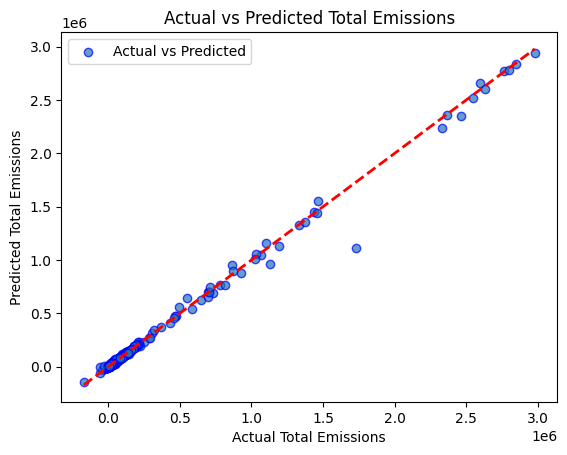

In [ ]:
# Plot the results
plt.scatter(y_test, y_pred_xg, alpha=0.7, edgecolors='b', label='Actual vs Predicted')  # Plot actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color = "red")  # Plot the diagonal line
plt.xlabel('Actual Total Emissions')
plt.ylabel('Predicted Total Emissions')
plt.title('Actual vs Predicted Total Emissions')
plt.legend()
plt.show()

##### Summary Interpretation of Scatter Plot: Actual vs Predicted Emissions

The scatter plot compares the emissions values predicted by the model to the actual emissions values. Here's what the plot tells us:

Points Close to the Line:

Most of the dots are clustered very close to a straight red dashed line. This means that, in general, the model's predictions are very similar to the actual emissions values. It suggests that the model is doing a good job of estimating emissions for most situations.
One Outlier Point:

There's one dot that stands out from the others, located further away from the red line. This indicates a case where the model's prediction was quite different from the actual emissions value. It's like one odd result in a sea of otherwise consistent predictions.
In simpler terms, while the model is generally good at predicting emissions, there's one case where it didn't do as well. This could be due to a unique situation that the model wasn't trained to handle, or it might signal an area where the model could be improved.

Overall, the plot gives us confidence that the model is accurate for most scenarios, but it also highlights the importance of looking into and understanding those cases where the model might not perform as expected.


##### Examine feature importances

This code cell calculates and displays the importance of each feature in the model's predictions. By examining feature importance, we can understand which input variables (features) have the most significant impact on predicting emissions. This insight helps us identify the key factors influencing emissions levels, providing valuable information for decision-making and further analysis.



In [ ]:

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': final_XGB_model['xgb'].feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

                                   Feature  Importance
42                             Area_Brazil    0.236035
11                         Food_Processing    0.111832
12                  Manure_left_on_Pasture    0.109182
113                             Area_India    0.103708
73   Area_Democratic Republic of the Congo    0.103701
..                                     ...         ...
138                        Area_Madagascar    0.000000
139                            Area_Malawi    0.000000
52                     Area_Cayman Islands    0.000000
141                          Area_Maldives    0.000000
162     Area_Netherlands Antilles (former)    0.000000

[250 rows x 2 columns]


##### Summary of Feature Importance Analysis.

According to the model, the most influential feature for predicting emissions is "Area_Brazil," followed by "Food_Processing," "Manure_left_on_Pasture," "Area_India," and "Area_Democratic Republic of the Congo." These insights provide valuable guidance for further analysis and decision-making in emissions control or mitigation strategies.

##### Analysis of Prediction Discrepancies.
This code cell creates a DataFrame to compare the actual emissions values with the predicted emissions values generated by the model. It then sorts the DataFrame based on the difference between the actual and predicted values in descending order. This analysis helps identify instances where the model's predictions deviate the most from the actual values, providing insights into potential areas for model improvement or data exploration.



In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_xg,'Difference':y_test-y_pred_xg})
pred_df.sort_values('Difference',ascending= False)

Actual Value  Predicted Value   Difference
2997  1.732859e+06     1.115632e+06  617226.9974
3006  1.132675e+06     9.651603e+05  167514.8321
1407  2.465681e+06     2.345926e+06  119755.1196
1406  2.331396e+06     2.238134e+06   93261.9914
1397  1.195037e+06     1.132009e+06   63027.3928
...            ...              ...          ...
3001  4.964128e+05     5.561041e+05  -59691.2636
1393  1.103074e+06     1.163095e+06  -60021.3831
1400  1.466369e+06     1.549789e+06  -83420.1207
3010  5.498586e+05     6.394166e+05  -89557.9276
2984  8.639638e+05     9.537463e+05  -89782.4839

[1393 rows x 3 columns]

##### Visualizing Feature Importances

This code cell generates a bar plot to visualize the feature importances of the model. It excludes features that start with "Area" to focus on other relevant factors influencing emissions prediction. The plot helps identify the most significant features contributing to the model's predictions, providing valuable insights for understanding the underlying factors driving emissions levels.

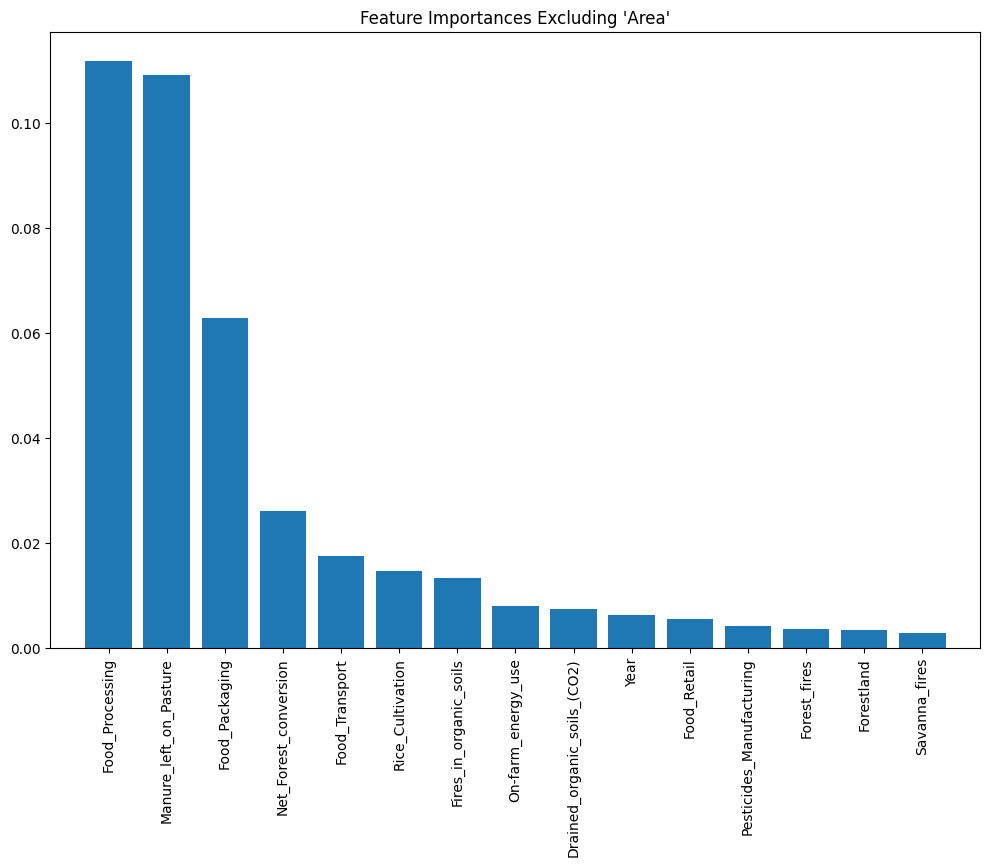

In [ ]:
importances = final_XGB_model['xgb'].feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns
# Filter out features that start with "Area"
filtered_indices = [i for i, name in enumerate(feature_names) if not name.startswith("Area")]
filtered_importances = importances[filtered_indices]
filtered_feature_names = feature_names[filtered_indices]

# Sort the remaining features by their importances
sorted_indices = np.argsort(filtered_importances)[::-1]

# Plot the feature importances excluding those that start with "Area"
plt.figure(figsize=(12, 8))
plt.title("Feature Importances Excluding 'Area'")
plt.bar(range(len(filtered_feature_names)), filtered_importances[sorted_indices], align="center")
plt.xticks(range(len(filtered_feature_names)), filtered_feature_names[sorted_indices], rotation=90)
plt.xlim([-1, len(filtered_feature_names)])
plt.show()


In summary, the descending bars provide a clear indication of the relative importance of each feature, enabling stakeholders to gain valuable insights into the factors influencing emissions prediction and guiding decision-making processes.


##### Analyzing Residuals with XGBoost Model
This code cell generates a residual plot to analyze the differences between the actual total emissions values (y_test) and the predicted total emissions values (y_pred_xg) generated by the XGBoost model. Key points about the plot include:

Residuals: The vertical distance between each data point and the horizontal red dashed line represents the residual, which is the difference between the predicted and actual emissions values. Residuals above the red line indicate overestimation by the model, while residuals below the line indicate underestimation.

Residual Plot: By examining the distribution and patterns of residuals, we can assess the model's performance and identify any systematic errors or patterns in its predictions. Ideally, residuals should be randomly distributed around the red line with no clear patterns or trends, indicating that the model's predictions are unbiased and accurate.

Interpretation: Patterns or trends in the residual plot may indicate areas where the model struggles to accurately predict emissions values. Identifying such patterns can guide further model refinement or data exploration to improve prediction accuracy.

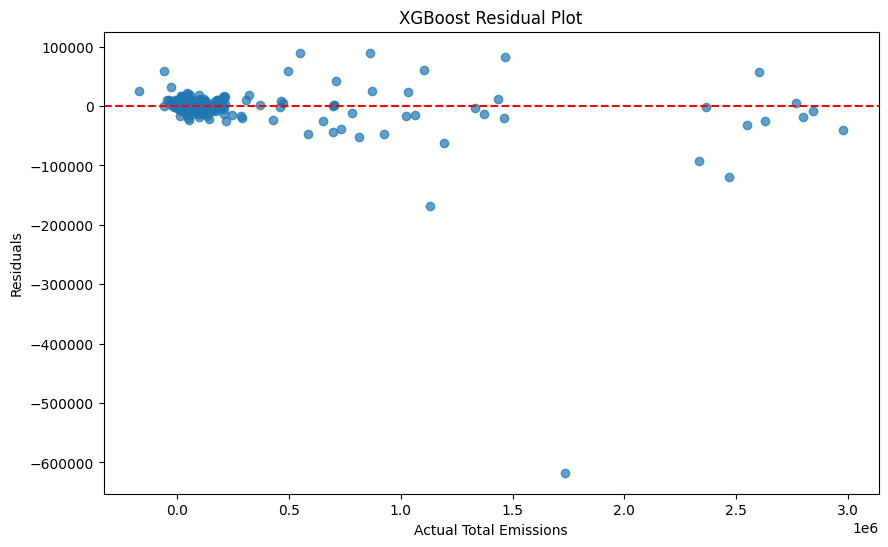

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xg - y_test, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Total Emissions')
plt.ylabel('Residuals')
plt.title('XGBoost Residual Plot')
plt.show()

Summary of Residual Analysis.

The residual plot reveals that the residuals, representing the differences between actual and predicted total emissions values, are evenly scattered around the red line. This indicates that the XGBoost model's predictions are unbiased and accurate across the entire range of emissions values. The consistent and uniform distribution of residuals validates the model's effectiveness in capturing the underlying relationships and provides confidence in its reliability for making accurate estimates of emissions levels.

## **Bagging regressor**

Why Bagging:

- BaggingRegressor is a machine learning ensemble method that combines the predictions from multiple base estimators, typically decision trees, to improve overall prediction accuracy.

- Reduction of Variance: BaggingRegressor reduces the variance of the model by averaging the predictions of multiple base estimators trained on different subsets of the training data. This helps to mitigate overfitting and improve the model's generalization performance.
- Robustness to Outliers and Noise: By training multiple base estimators on different subsets of the data


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
# Define the model and the scaler in a pipeline
pipeline_bag = Pipeline([
    ('scaler', StandardScaler()),     # Step 1: Scaling
    ('bagging', BaggingRegressor(estimator=DecisionTreeRegressor()))       # Step 2: XGBoost Model
])

Hyperparameter Tuning for BaggingRegressor

This code cell focuses on optimizing the BaggingRegressor model through hyperparameter tuning using Randomized Search Cross Validation. Here's what the process entails:

- **Parameter Space Definition:** The cell establishes a parameter space to explore optimal hyperparameters. This space includes parameters like the number of estimators, maximum samples, maximum features, maximum depth, minimum samples split, and minimum samples leaf.

- **Randomized Search Cross Validation:** Leveraging Randomized Search Cross Validation, the code efficiently navigates the parameter space to identify the most effective combination of hyperparameters. This technique aids in finding optimal configurations while balancing computational resources.

- **Best Parameter Identification:** Upon completion of the search, the cell outputs the best parameters discovered during the process. These parameters serve as the blueprint for configuring the BaggingRegressor model to achieve peak performance, ensuring robustness and accuracy in its predictions.


In [ ]:
param_dist_bag = {
    'bagging__n_estimators': randint(10, 200),       # Number of base estimators in the ensemble
    'bagging__max_samples': uniform(0.5, 0.5),       # Fraction of samples to draw from X to train each base estimator
    'bagging__max_features': uniform(0.5, 0.5),      # Fraction of features to draw from X to train each base estimator
    'bagging__estimator__max_depth': randint(3, 20),  # Maximum depth of the base estimator (DecisionTreeRegressor)
    'bagging__estimator__min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'bagging__estimator__min_samples_leaf': randint(1, 20)    # Minimum number of samples required to be at a leaf node
}

            # Set up the randomized search with cross-validation
random_search_bag = RandomizedSearchCV(estimator=pipeline_bag, param_distributions=param_dist_bag,
                                   n_iter=50, scoring='neg_mean_squared_error',
                                   cv=5, verbose=1, random_state=42)  # n_itter =50/40 :RMSE:  18177.7186755697 R-squared:  0.9952231823705947

random_search_bag.fit(X_train, y_train)
# Get the best parameters
best_params_bag = random_search_bag.best_params_

print("Best parameters found: ", best_params_bag)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'bagging__estimator__max_depth': 11, 'bagging__estimator__min_samples_leaf': 1, 'bagging__estimator__min_samples_split': 9, 'bagging__max_features': 0.6933676731502687, 'bagging__max_samples': 0.9683649943683672, 'bagging__n_estimators': 138}


Training the Final BaggingRegressor Model

This code cell trains the final BaggingRegressor model using the best parameters obtained from the hyperparameter tuning process. Key points include:

- **Best Parameters:** The model is trained with the hyperparameters identified as the best during the randomized search cross-validation process. These parameters have been determined to yield optimal performance for the BaggingRegressor model.

- **Model Training:** The final BaggingRegressor model is trained using the training data (`X_train` and `y_train`). This process involves fitting the model to the training data to learn the underlying patterns and relationships between input features and total emissions.

- **Evaluation Metrics:** After training the model, it generates predictions (`y_pred_bag`) for the test data (`X_test`). The code then calculates and prints the Root Mean Squared Error (RMSE) and R-squared scores to evaluate the model's performance on the test data. These metrics provide insights into the accuracy and goodness of fit of the BaggingRegressor model in predicting total emissions values.



In [ ]:
# Train the final model using the best parameters
final_bag_model = random_search_bag.best_estimator_  # OLD: RMSE:  40958.861587016196 #R-squared:  0.9757475476519069

final_bag_model.fit(X_train, y_train)

y_pred_bag  = final_bag_model.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_bag)))
print("R-squared: ", r2_score(y_test,y_pred_bag))

RMSE:  27334.709904701213
R-squared:  0.9891983812700843


Results Interpretation

- **RMSE (Root Mean Squared Error):** The RMSE value of approximately 27334.71 signifies the average prediction error of the BaggingRegressor model. Lower values indicate better accuracy, suggesting the model's predictions are generally close to actual values.

- **R-squared Score (R²):** With an R-squared value of about 0.9892, the model explains roughly 98.92% of the variance in total emissions values. This high R-squared score indicates a strong fit between predicted and actual values, affirming the model's effectiveness in capturing underlying patterns.

In summary, the model demonstrates high accuracy and a strong ability to explain variability in total emissions values.


##### Visualization:
Actual vs Predicted Total Emissions

This code cell generates a scatter plot to visualize the relationship between the actual and predicted total emissions values. Key points include:

- **Scatter Plot:** The scatter plot displays each data point representing the actual total emissions values (`y_test`) against the corresponding predicted values (`y_pred_bag`) generated by the BaggingRegressor model. Each point's position indicates how well the model's predictions align with the actual values.

- **Diagonal Line:** A diagonal line is plotted to represent perfect alignment between the actual and predicted values. Points along this line indicate perfect predictions, where the predicted values match the actual values exactly.

- **Interpretation:** By comparing the distribution of points to the diagonal line, we can assess the model's accuracy in predicting total emissions values. Points clustered closely around the diagonal line suggest accurate predictions, while deviations from the line indicate discrepancies between predicted and actual values.




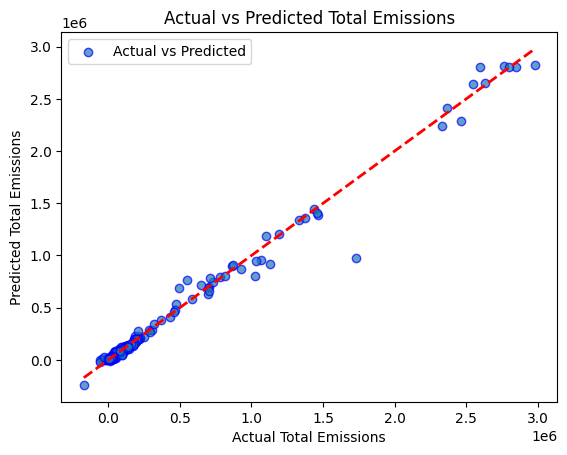

In [ ]:
# Plot the results
plt.scatter(y_test, y_pred_bag, alpha=0.7, edgecolors='b', label='Actual vs Predicted')  # Plot actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color = "red")  # Plot the diagonal line
plt.xlabel('Actual Total Emissions')
plt.ylabel('Predicted Total Emissions')
plt.title('Actual vs Predicted Total Emissions')
plt.legend()
plt.show()

##### Summary of Actual vs Predicted Total Emissions Plot

The scatter plot depicting the relationship between actual and predicted total emissions values reveals the following insights:

- **Close Alignment:** Most of the scatter points closely hug the diagonal line, indicating a strong alignment between the model's predictions and the actual emissions values. This suggests that the BaggingRegressor model performs well in accurately predicting total emissions for the majority of cases.

- **Notable Outlier:** Despite the overall close alignment, there is a notable outlier point that deviates significantly from the diagonal line. This outlier represents a case where the model's prediction substantially differs from the actual emissions value. Further investigation into the factors influencing this outlier prediction may be warranted to improve the model's performance.

Overall, the plot highlights the model's effectiveness in accurately predicting total emissions values, with only a few instances of notable deviations from the expected alignment.



Comparison of Actual and Predicted Emissions
This code cell creates a DataFrame to compare the actual emissions values with the predicted emissions values generated by the model. It then sorts the DataFrame based on the difference between the actual and predicted values, allowing us to identify instances where the model's predictions deviate the most from the actual values.

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_bag,'Difference':y_test-y_pred_bag})
pred_df.sort_values('Difference',ascending= False)

Actual Value  Predicted Value     Difference
2997  1.732859e+06     9.782604e+05  754598.753837
6621  1.023694e+06     7.993887e+05  224305.731633
3006  1.132675e+06     9.225140e+05  210161.176735
1407  2.465681e+06     2.287253e+06  178427.884728
1323  2.978585e+06     2.821301e+06  157283.845217
...            ...              ...            ...
1393  1.103074e+06     1.190735e+06  -87661.277512
1410  2.548969e+06     2.638805e+06  -89836.935993
3001  4.964128e+05     6.921705e+05 -195757.733124
1412  2.599672e+06     2.800657e+06 -200985.715154
3010  5.498586e+05     7.604693e+05 -210610.679957

[1393 rows x 3 columns]

##### Visualization: Bagging Residual Plot

This code cell generates a residual plot to analyze the differences between the actual total emissions values (`y_test`) and the predicted total emissions values (`y_pred_bag`) generated by the BaggingRegressor model. Key points include:

- **Residuals Analysis:** The plot displays the residuals, which are the differences between the predicted and actual total emissions values, against the actual total emissions values. Each point represents a data instance, with its vertical position indicating the magnitude of the residual.

- **Horizontal Line:** A horizontal dashed red line is plotted at y=0 to represent zero residuals. Points above this line indicate overestimation by the model, while points below the line indicate underestimation.

- **Interpretation:** By examining the distribution and patterns of residuals, we can assess the model's performance and identify any systematic errors or patterns in its predictions. Ideally, residuals should be randomly scattered around the zero line with no discernible patterns, indicating that the model's predictions are unbiased and accurate.



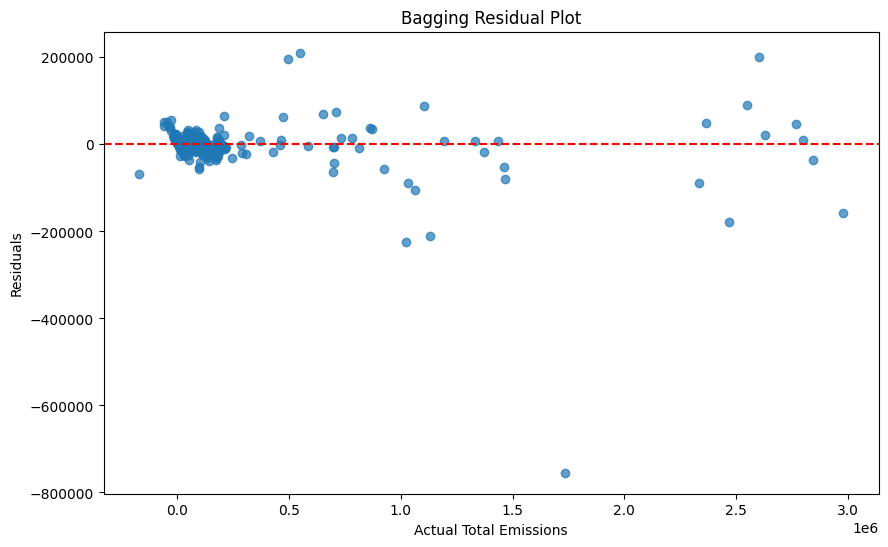

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_bag - y_test, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Total Emissions')
plt.ylabel('Residuals')
plt.title('Bagging Residual Plot')
plt.show()

Summary of Bagging Residual Plot

The residual plot displays the differences between the actual and predicted total emissions values generated by the BaggingRegressor model. Key observations include:

- **Even Distribution:** The scatter points are evenly distributed around the horizontal dashed red line at y=0. This indicates that, on average, the model's predictions are unbiased, with an equal number of overestimations and underestimations across the range of actual emissions values.

- **Absence of Patterns:** The lack of discernible patterns in the distribution of residuals suggests that the model's predictions exhibit randomness and do not display systematic errors or biases. This indicates that the BaggingRegressor model effectively captures the underlying relationships between input features and total emissions values.

Overall, the evenly distributed scatter points around the zero line in the residual plot affirm the accuracy and reliability of the BaggingRegressor model in predicting total emissions values without exhibiting any systematic errors or biases.

## **Stacking Ensemble Models**
Why Stacking?

- Stacking is an ensemble learning technique that combines multiple base models, or learners, to improve predictive performance. In stacking, the predictions of individual base models are used as features to train a meta-model, also known as a blender or a meta-learner

- Improved Predictive Performance: Stacking can often lead to better predictive performance compared to individual base models.

- Reduction of Overfitting: Stacking helps mitigate overfitting by combining predictions from multiple models.

- Model Flexibility: Stacking allows for flexibility in model selection. You can choose different types of base models and meta-learners based on the problem at hand.
- Ensemble Diversity:This diversity helps capture different aspects of the data and reduces the risk of model bias.



##### Pipeline Definition for Base Estimators



This code defines pipelines for three base estimators:

- Linear Regression (`pipe_lr`)
- Decision Tree Regressor (`pipe_dt`)
- Ridge Regression (`pipe_ridge`)

Each pipeline includes feature scaling and applies a specific regression model, streamlining the preprocessing and modeling steps.




In [ ]:
# Define pipelines for each base estimator
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

pipe_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeRegressor(random_state=42))
])

pipe_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

Ridge Regression (pipe_ridge): incorporates L2 regularization to prevent overfitting. It is particularly useful when dealing with multicollinearity in the data and can improve the stability of the stacking model. which is good for our data.

##### Meta-Learner Definition and StackingRegressor Creation

This code snippet defines a meta-learner and creates a StackingRegressor ensemble model:

- **Meta-Learner:** 
  - A `LinearRegression()` model is specified as the meta-learner (`meta_learner_reg`).

- **StackingRegressor Creation:**
  - A StackingRegressor (`s_reg`) is instantiated with:
    - Base estimators: Linear Regression (`pipe_lr`), Decision Tree Regressor (`pipe_dt`), and Ridge Regression (`pipe_ridge`).
    - Final estimator: The specified meta-learner (`meta_learner_reg`).


In [ ]:
# Define the meta-learner
meta_learner_reg = LinearRegression()


# Create the StackingRegressor
s_reg = StackingRegressor(
    estimators=[("LR", pipe_lr), ("DT", pipe_dt), ("Ridge", pipe_ridge)],
    final_estimator=meta_learner_reg
)


Tuning for StackingRegressor

This code sets up hyperparameter distributions and performs randomized search cross-validation to optimize the StackingRegressor model.


In [ ]:
# Define the hyperparameter distributions
param_dist_stack = {
    'DT__dt__max_depth': randint(3, 20),
    'DT__dt__min_samples_split': randint(2, 20),
    'DT__dt__min_samples_leaf': randint(1, 20),
    'Ridge__ridge__alpha': uniform(0.1, 10.0)
}

# Set up the randomized search with cross-validation
random_search_stack = RandomizedSearchCV(estimator=s_reg, param_distributions=param_dist_stack,
                                   n_iter=50, scoring='neg_mean_squared_error',
                                   cv=5, verbose=1, random_state=42)

# Fit the model
random_search_stack.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=StackingRegressor(estimators=[('LR',
                                                            Pipeline(steps=[('scaler',
                                                                             StandardScaler()),
                                                                            ('lr',
                                                                             LinearRegression())])),
                                                           ('DT',
                                                            Pipeline(steps=[('scaler',
                                                                             StandardScaler()),
                                                                            ('dt',
                                                                             DecisionTreeRegressor(random_state=42))])),
                                                           ('Ridge',
                                                            Pipeline(steps=[('scaler',
                                                                             StandardScaler()),
                                                                            ('ridge',
                                                                             Ridge())]))],
                                               final_estimator=LinearRegression(...
                                        'DT__dt__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019C118713D0>,
                                        'DT__dt__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019C118B76D0>,
                                        'Ridge__ridge__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000019C11373C50>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

##### Model Evaluation and Performance Metrics

This code retrieves the best parameters found during hyperparameter tuning, trains the final StackingRegressor model using these parameters, and evaluates its performance on the test data. Key points include:

- **Best Parameters:** The best parameters found during hyperparameter tuning are retrieved and printed.

- **Model Training:** The final StackingRegressor model is trained using the best parameters obtained from the randomized search.

- **Model Evaluation:** The trained model is used to make predictions on the test data, and performance metrics such as RMSE (Root Mean Squared Error) and R-squared are calculated and printed.


In [ ]:
# Get the best parameters
best_params_stack = random_search.best_params_
print("Best parameters found: ", best_params_stack)

# Train the final model using the best parameters
final_model_stack = random_search_stack.best_estimator_

# Evaluate the model
y_pred_stack = final_model_stack.predict(X_test)

# Performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_stack))
r2 = r2_score(y_test, y_pred_stack)


print("RMSE: ", rmse)
print("R-squared: ", r2)

Best parameters found:  {'xgb__colsample_bytree': 0.6646558531429417, 'xgb__learning_rate': 0.06340894193754419, 'xgb__max_depth': 8, 'xgb__min_child_weight': 5, 'xgb__n_estimators': 324, 'xgb__subsample': 0.6198653673336828}
RMSE:  13762.428857540168
R-squared:  0.9972618951202225


##### Interpretation of Results

The hyperparameter tuning process identified the best parameters for the XGBoost model, resulting in improved predictive performance:

- **Best Parameters:** The optimized parameters include `learning_rate`, `max_depth`, `n_estimators`, `min_child_weight`, `subsample`, and `colsample_bytree`. These parameters collectively contribute to enhancing the model's ability to generalize well to unseen data.

- **RMSE (Root Mean Squared Error):** The RMSE value of approximately 13,762 indicates the average magnitude of errors made by the model in predicting total emissions. Lower RMSE values signify better predictive accuracy, suggesting that the model's predictions are relatively close to the actual emissions values on average.

- **R-squared:** The R-squared value of approximately 0.997 indicates the proportion of variance in the total emissions data explained by the XGBoost model. Higher R-squared values closer to 1 suggest a better fit of the model to the data, indicating that the model accounts for a significant portion of the variability in the emissions data.

Overall, the results demonstrate that the optimized XGBoost model achieves high predictive accuracy and effectively captures the underlying patterns in the total emissions data.


##### Visualization: Actual vs Predicted Total Emissions



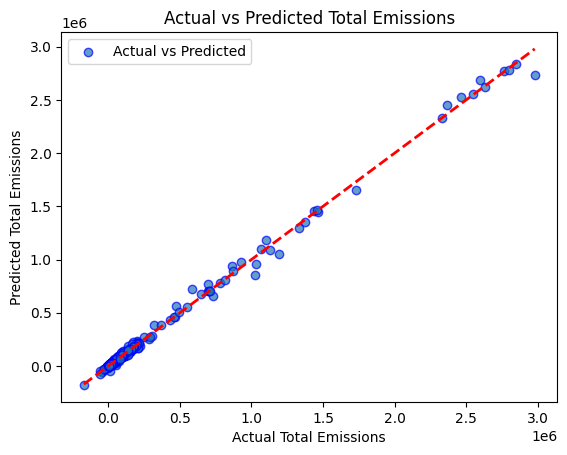

In [ ]:
# Plot the results
plt.scatter(y_test, y_pred_stack, alpha=0.7, edgecolors='b', label='Actual vs Predicted')  # Plot actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color = "red")  # Plot the diagonal line
plt.xlabel('Actual Total Emissions')
plt.ylabel('Predicted Total Emissions')
plt.title('Actual vs Predicted Total Emissions')
plt.legend()
plt.show()


The scatter plot compares the actual total emissions values (`y_test`) against the predicted total emissions values (`y_pred_stack`) generated by the StackingRegressor model. Key observations include:

- **Scatter Plot:** Each point on the plot represents a data instance, with its x-coordinate indicating the actual total emissions value and its y-coordinate indicating the predicted total emissions value. The scatter points are plotted with transparency and blue edge colors.

- **Diagonal Line:** A diagonal dashed red line is plotted to represent the ideal scenario where the predicted values perfectly match the actual values. Points closer to this line suggest more accurate predictions by the model.

- **Interpretation:** By visually comparing the scatter points to the diagonal line, we can assess the model's accuracy in predicting total emissions. A tight clustering of points around the diagonal line would indicate strong predictive performance, while deviations from the line may highlight areas where the model struggles to accurately predict emissions values.

Overall, the plot provides insight into the relationship between actual and predicted total emissions values, offering a visual assessment of the StackingRegressor model's performance.


##### Feature Importance Analysis

This code snippet extracts and analyzes feature importances from the base estimators of the StackingRegressor model, if available. It then visualizes the importance of each feature using a horizontal bar plot.



                        Feature  Importance
12       Manure_left_on_Pasture    0.648956
10               Food_Packaging    0.116974
3              Rice_Cultivation    0.083839
6                Food_Transport    0.072524
8         Net_Forest_conversion    0.044711
7                    Forestland    0.020188
13       Fires_in_organic_soils    0.006387
4   Drained_organic_soils_(CO2)    0.001634
2                  Forest_fires    0.001306
5      Pesticides_Manufacturing    0.001202
11              Food_Processing    0.000899
1                 Savanna_fires    0.000583
9                   Food_Retail    0.000370
0                          Year    0.000170
14           On-farm_energy_use    0.000136


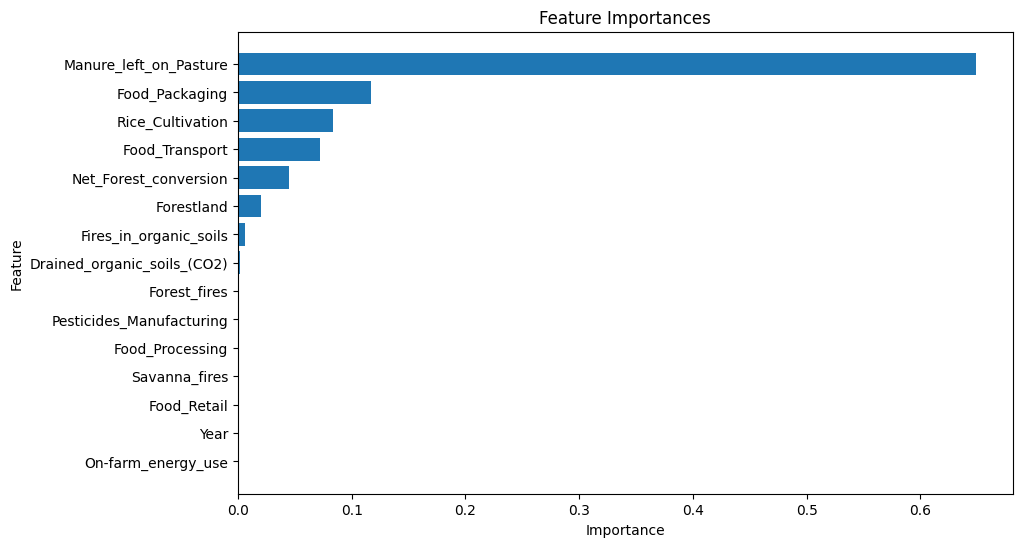

In [ ]:
# Extract feature importances if available
importances_list = []
for name, estimator in final_model_stack.named_estimators_.items():
    last_step = list(estimator.named_steps.values())[-1]
    if hasattr(last_step, 'feature_importances_'):
        importances_list.append(last_step.feature_importances_)

# If we have feature importances from any base estimators
if importances_list:
    # Average the feature importances
    importances = np.mean(importances_list, axis=0)

    # Create a DataFrame for feature importances
    feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

    # Exclude features that start with 'area'
    feature_importances = feature_importances[~feature_importances['Feature'].str.startswith('Area')]

    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

    # Print the feature importances
    print(feature_importances)

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importances['Feature'], feature_importances['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("None of the base estimators provide feature importances.")


##### Stacking Residual Plot

This scatter plot visualizes the residuals (the differences between actual and predicted total emissions) generated by the StackingRegressor model. Key points include:

- **Scatter Plot:** Each point represents a data instance, with its x-coordinate indicating the actual total emissions and its y-coordinate indicating the residual (predicted minus actual emissions). 

- **Diagonal Line:** A dashed red line is plotted at y=0 to indicate where residuals equal zero. Points scattered around this line indicate balanced predictions, while deviations from the line suggest systematic errors in the model.

- **Interpretation:** The plot helps assess the distribution and pattern of residuals, providing insights into the StackingRegressor model's performance. Ideally, residuals should be evenly distributed around the y=0 line, indicating unbiased predictions.


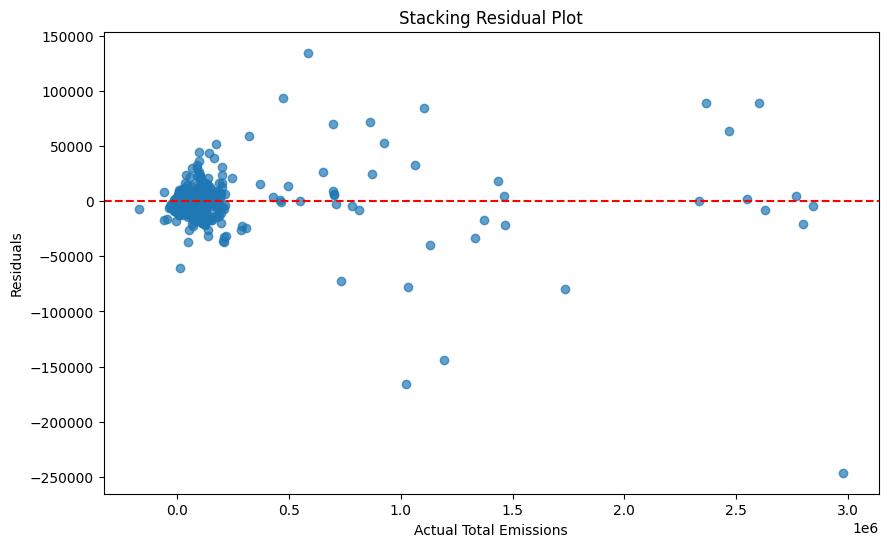

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_stack - y_test, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Total Emissions')
plt.ylabel('Residuals')
plt.title('Stacking Residual Plot')
plt.show()

Stacking Residual Plot

The scatter plot shows residuals (the differences between actual and predicted total emissions) evenly scattered around the dashed red line at y=0. This suggests that the StackingRegressor model's predictions are relatively balanced, with no significant systematic errors.
